<a href="https://colab.research.google.com/github/AkiraGabriel/Enem-2019/blob/main/Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Olympiad - QUALITY EDUCATION

ML Olympiad – Previsão das notas da prova do ENEM ([Link](https://www.kaggle.com/competitions/qualityeducation/data))

[Dicionário de dados](https://docs.google.com/spreadsheets/d/14C4lbQFEmUnIJN17gr01L8ikXsT27eHZ/edit?usp=sharing&ouid=101143319330377699057&rtpof=true&sd=true) (significado das colunas)

In [1]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 745 kB/s 


In [2]:
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype #Acrescentado
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from IPython.display import display, Markdown
from sklearn import svm
import statsmodels.api as sm
import re
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders import one_hot

In [3]:
BASEDIR = Path('.') / 'data'
df = pd.read_csv(BASEDIR / 'train.csv', nrows=5000)

## Dicionário de dados

In [ ]:
dicionario = pd.read_excel('Dicionario_Microdados_Enem.xlsx', skiprows=2)
display(Markdown(dicionario.to_markdown(index=False)))

| NOME DA VARIÁVEL                                                                                                             | Descrição                                                                                                                                                                                                                                                                             | Variáveis Categóricas   | Unnamed: 3                                                                                                                                                                                                                                                                                                                                                                                                                                            |   Tamanho  | Tipo         |
|:-----------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------:|:-------------|
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | Categoria               | Descrição                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| DADOS DO PARTICIPANTE                                                                                                        | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| NU_INSCRICAO                                                                                                                 | Número de inscrição1                                                                                                                                                                                                                                                                  | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |         36 | Alfanumérica |
| CO_MUNICIPIO_RESIDENCIA                                                                                                      | Código do município de residência                                                                                                                                                                                                                                                     | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          7 | Numérica     |
| nan                                                                                                                          | 1º dígito: Região                                                                                                                                                                                                                                                                     | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 1º e 2º dígitos: UF                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 3º, 4º, 5º e 6º dígitos: Município                                                                                                                                                                                                                                                    | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 7º dígito: dígito verificador                                                                                                                                                                                                                                                         | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| NO_MUNICIPIO_RESIDENCIA                                                                                                      | Nome do município de residência                                                                                                                                                                                                                                                       | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        150 | Alfanumérica |
| CO_UF_RESIDENCIA                                                                                                             | Código da Unidade da Federação de residência                                                                                                                                                                                                                                          | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          2 | Numérica     |
| SG_UF_RESIDENCIA                                                                                                             | Sigla da Unidade da Federação de residência                                                                                                                                                                                                                                           | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          2 | Alfanumérica |
| NU_IDADE                                                                                                                     | Idade2                                                                                                                                                                                                                                                                                | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          3 | Numérica     |
| TP_SEXO                                                                                                                      | Sexo                                                                                                                                                                                                                                                                                  | M                       | Masculino                                                                                                                                                                                                                                                                                                                                                                                                                                             |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | F                       | Feminino                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| TP_ESTADO_CIVIL                                                                                                              | Estado Civil                                                                                                                                                                                                                                                                          | 0                       | Não informado                                                                                                                                                                                                                                                                                                                                                                                                                                         |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | Solteiro(a)                                                                                                                                                                                                                                                                                                                                                                                                                                           |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Casado(a)/Mora com companheiro(a)                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Divorciado(a)/Desquitado(a)/Separado(a)                                                                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | Viúvo(a)                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| TP_COR_RACA                                                                                                                  | Cor/raça                                                                                                                                                                                                                                                                              | 0                       | Não declarado                                                                                                                                                                                                                                                                                                                                                                                                                                         |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | Branca                                                                                                                                                                                                                                                                                                                                                                                                                                                |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Preta                                                                                                                                                                                                                                                                                                                                                                                                                                                 |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Parda                                                                                                                                                                                                                                                                                                                                                                                                                                                 |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | Amarela                                                                                                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 5                       | Indígena                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| TP_NACIONALIDADE                                                                                                             | Nacionalidade                                                                                                                                                                                                                                                                         | 0                       | Não informado                                                                                                                                                                                                                                                                                                                                                                                                                                         |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | Brasileiro(a)                                                                                                                                                                                                                                                                                                                                                                                                                                         |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Brasileiro(a) Naturalizado(a)                                                                                                                                                                                                                                                                                                                                                                                                                         |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Estrangeiro(a)                                                                                                                                                                                                                                                                                                                                                                                                                                        |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | Brasileiro(a) Nato(a), nascido(a) no exterior                                                                                                                                                                                                                                                                                                                                                                                                         |        nan | nan          |
| CO_MUNICIPIO_NASCIMENTO                                                                                                      | Código do município de nascimento                                                                                                                                                                                                                                                     | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          7 | Numérica     |
| nan                                                                                                                          | 1º dígito: Região                                                                                                                                                                                                                                                                     | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 1º e 2º dígitos: UF                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 3º, 4º, 5º e 6º dígitos: Município                                                                                                                                                                                                                                                    | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 7º dígito: dígito verificador                                                                                                                                                                                                                                                         | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| NO_MUNICIPIO_NASCIMENTO                                                                                                      | Nome do município de nascimento                                                                                                                                                                                                                                                       | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        150 | Alfanumérica |
| CO_UF_NASCIMENTO                                                                                                             | Código da Unidade da Federação de nascimento                                                                                                                                                                                                                                          | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          2 | Numérica     |
| SG_UF_NASCIMENTO                                                                                                             | Sigla da Unidade da Federação de nascimento                                                                                                                                                                                                                                           | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          2 | Alfanumérica |
| TP_ST_CONCLUSAO                                                                                                              | Situação de conclusão do Ensino Médio                                                                                                                                                                                                                                                 | 1                       | Já concluí o Ensino Médio                                                                                                                                                                                                                                                                                                                                                                                                                             |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Estou cursando e concluirei o Ensino Médio no ano corrente                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Estou cursando e concluirei o Ensino Médio após o ano corrente                                                                                                                                                                                                                                                                                                                                                                                        |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | Não concluí e não estou cursando o Ensino Médio                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| TP_ANO_CONCLUIU                                                                                                              | Ano de Conclusão do Ensino Médio                                                                                                                                                                                                                                                      | 0                       | Não informado                                                                                                                                                                                                                                                                                                                                                                                                                                         |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | 2018                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | 2017                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | 2016                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | 2015                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 5                       | 2014                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 6                       | 2013                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 7                       | 2012                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 8                       | 2011                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 9                       | 2010                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 10                      | 2009                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 11                      | 2008                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 12                      | 2007                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 13                      | Antes de 2007                                                                                                                                                                                                                                                                                                                                                                                                                                         |        nan | nan          |
| TP_ESCOLA                                                                                                                    | Tipo de escola do Ensino Médio                                                                                                                                                                                                                                                        | 1                       | Não Respondeu                                                                                                                                                                                                                                                                                                                                                                                                                                         |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Pública                                                                                                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Privada                                                                                                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | Exterior                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| TP_ENSINO                                                                                                                    | Tipo de instituição que concluiu ou concluirá o Ensino Médio                                                                                                                                                                                                                          | 1                       | Ensino Regular                                                                                                                                                                                                                                                                                                                                                                                                                                        |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Educação Especial - Modalidade Substitutiva                                                                                                                                                                                                                                                                                                                                                                                                           |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Educação de Jovens e Adultos                                                                                                                                                                                                                                                                                                                                                                                                                          |        nan | nan          |
| IN_TREINEIRO                                                                                                                 | Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos3                                                                                                                                                                                                    | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| DADOS DA ESCOLA                                                                                                              | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| CO_ESCOLA                                                                                                                    | Código da Escola4                                                                                                                                                                                                                                                                     | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          8 | Numérica     |
| CO_MUNICIPIO_ESC                                                                                                             | Código do município da escola                                                                                                                                                                                                                                                         | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          7 | Numérica     |
| nan                                                                                                                          | 1º dígito: Região                                                                                                                                                                                                                                                                     | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 1º e 2º dígitos: UF                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 3º, 4º, 5º e 6º dígitos: Município                                                                                                                                                                                                                                                    | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 7º dígito: dígito verificador                                                                                                                                                                                                                                                         | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| NO_MUNICIPIO_ESC                                                                                                             | Nome do município da escola                                                                                                                                                                                                                                                           | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        150 | Alfanumérica |
| CO_UF_ESC                                                                                                                    | Código da Unidade da Federação da escola                                                                                                                                                                                                                                              | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          2 | Numérica     |
| SG_UF_ESC                                                                                                                    | Sigla da Unidade da Federação da escola                                                                                                                                                                                                                                               | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          2 | Alfanumérica |
| TP_DEPENDENCIA_ADM_ESC                                                                                                       | Dependência administrativa (Escola)                                                                                                                                                                                                                                                   | 1                       | Federal                                                                                                                                                                                                                                                                                                                                                                                                                                               |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Estadual                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Municipal                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | Privada                                                                                                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| TP_LOCALIZACAO_ESC                                                                                                           | Localização (Escola)                                                                                                                                                                                                                                                                  | 1                       | Urbana                                                                                                                                                                                                                                                                                                                                                                                                                                                |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Rural                                                                                                                                                                                                                                                                                                                                                                                                                                                 |        nan | nan          |
| TP_SIT_FUNC_ESC                                                                                                              | Situação de funcionamento (Escola)                                                                                                                                                                                                                                                    | 1                       | Em atividade                                                                                                                                                                                                                                                                                                                                                                                                                                          |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Paralisada                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Extinta                                                                                                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| DADOS DOS PEDIDOS DE ATENDIMENTO ESPECIALIZADO                                                                               | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_BAIXA_VISAO                                                                                                               | Indicador de baixa visão5                                                                                                                                                                                                                                                             | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_CEGUEIRA                                                                                                                  | Indicador de cegueira5                                                                                                                                                                                                                                                                | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_SURDEZ                                                                                                                    | Indicador de surdez5                                                                                                                                                                                                                                                                  | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_DEFICIENCIA_AUDITIVA                                                                                                      | Indicador de deficiência auditiva5                                                                                                                                                                                                                                                    | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_SURDO_CEGUEIRA                                                                                                            | Indicador de surdo-cegueira5                                                                                                                                                                                                                                                          | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_DEFICIENCIA_FISICA                                                                                                        | Indicador de deficiência física5                                                                                                                                                                                                                                                      | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_DEFICIENCIA_MENTAL                                                                                                        | Indicador de deficiência mental5                                                                                                                                                                                                                                                      | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_DEFICIT_ATENCAO                                                                                                           | Indicador de déficit de atenção5                                                                                                                                                                                                                                                      | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_DISLEXIA                                                                                                                  | Indicador de dislexia5                                                                                                                                                                                                                                                                | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_DISCALCULIA                                                                                                               | Indicador de discalculia5                                                                                                                                                                                                                                                             | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_AUTISMO                                                                                                                   | Indicador de autismo5                                                                                                                                                                                                                                                                 | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_VISAO_MONOCULAR                                                                                                           | Indicador de visão monocular5                                                                                                                                                                                                                                                         | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_OUTRA_DEF                                                                                                                 | Indicador de outra deficiência ou condição especial5                                                                                                                                                                                                                                  | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| DADOS DOS PEDIDOS DE ATENDIMENTO ESPECÍFICO                                                                                  | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_GESTANTE                                                                                                                  | Indicador de gestante5                                                                                                                                                                                                                                                                | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_LACTANTE                                                                                                                  | Indicador de lactante5                                                                                                                                                                                                                                                                | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_IDOSO                                                                                                                     | Indicador de inscrito idoso5                                                                                                                                                                                                                                                          | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_ESTUDA_CLASSE_HOSPITALAR                                                                                                  | Indicador de inscrição em Unidade Hospitalar5                                                                                                                                                                                                                                         | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| DADOS DOS PEDIDOS DE RECURSOS ESPECIALIZADOS E ESPECÍFICOS PARA REALIZAÇÃO DAS PROVAS                                        | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_SEM_RECURSO                                                                                                               | Indicador de inscrito que não requisitou nenhum recurso                                                                                                                                                                                                                               | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_BRAILLE                                                                                                                   | Indicador de solicitação de prova em braille5                                                                                                                                                                                                                                         | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_AMPLIADA_24                                                                                                               | Indicador de solicitação de prova superampliada com fonte tamanho 245                                                                                                                                                                                                                 | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_AMPLIADA_18                                                                                                               | Indicador de solicitação de prova ampliada com fonte tamanho 185                                                                                                                                                                                                                      | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_LEDOR                                                                                                                     | Indicador de solicitação de auxílio para leitura (ledor)5                                                                                                                                                                                                                             | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_ACESSO                                                                                                                    | Indicador de solicitação de sala de fácil acesso5                                                                                                                                                                                                                                     | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_TRANSCRICAO                                                                                                               | Indicador de solicitação de auxílio para transcrição5                                                                                                                                                                                                                                 | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_LIBRAS                                                                                                                    | Indicador de solicitação de Tradutor- Intérprete Libras5                                                                                                                                                                                                                              | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_TEMPO_ADICIONAL                                                                                                           | Indicador de solicitação de tempo adicional5                                                                                                                                                                                                                                          | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_LEITURA_LABIAL                                                                                                            | Indicador de solicitação de leitura labial5                                                                                                                                                                                                                                           | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MESA_CADEIRA_RODAS                                                                                                        | Indicador de solicitação de mesa para cadeira de rodas5                                                                                                                                                                                                                               | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MESA_CADEIRA_SEPARADA                                                                                                     | Indicador de solicitação de mesa e cadeira separada5                                                                                                                                                                                                                                  | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_APOIO_PERNA                                                                                                               | Indicador de solicitação de apoio de perna e pé5                                                                                                                                                                                                                                      | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_GUIA_INTERPRETE                                                                                                           | Indicador de solicitação de guia intérprete5                                                                                                                                                                                                                                          | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_COMPUTADOR                                                                                                                | Indicador de solicitação de computador5                                                                                                                                                                                                                                               | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_CADEIRA_ESPECIAL                                                                                                          | Indicador de solicitação de cadeira especial5                                                                                                                                                                                                                                         | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_CADEIRA_CANHOTO                                                                                                           | Indicador de solicitação de cadeira para canhoto5                                                                                                                                                                                                                                     | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_CADEIRA_ACOLCHOADA                                                                                                        | Indicador de solicitação de cadeira acolchoada5                                                                                                                                                                                                                                       | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_PROVA_DEITADO                                                                                                             | Indicador de solicitação para fazer prova deitado em maca ou mobiliário similar5                                                                                                                                                                                                      | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MOBILIARIO_OBESO                                                                                                          | Indicador de solicitação de mobiliário adequado para obeso5                                                                                                                                                                                                                           | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_LAMINA_OVERLAY                                                                                                            | Indicador de solicitação de lâmina overlay5                                                                                                                                                                                                                                           | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_PROTETOR_AURICULAR                                                                                                        | Indicador de solicitação de protetor auricular5                                                                                                                                                                                                                                       | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MEDIDOR_GLICOSE                                                                                                           | Indicador de solicitação de medidor de glicose e/ou aplicação de insulina5                                                                                                                                                                                                            | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MAQUINA_BRAILE                                                                                                            | Indicador de solicitação de máquina Braile e/ou Reglete e Punção5                                                                                                                                                                                                                     | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_SOROBAN                                                                                                                   | Indicador de solicitação de soroban5                                                                                                                                                                                                                                                  | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MARCA_PASSO                                                                                                               | Indicador de solicitação de marca-passo (impeditivo de uso de detector de metais)5                                                                                                                                                                                                    | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_SONDA                                                                                                                     | Indicador de solicitação de sonda com troca periódica5                                                                                                                                                                                                                                | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MEDICAMENTOS                                                                                                              | Indicador de solicitação de medicamentos5                                                                                                                                                                                                                                             | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_SALA_INDIVIDUAL                                                                                                           | Indicador de solicitação de sala especial individual5                                                                                                                                                                                                                                 | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_SALA_ESPECIAL                                                                                                             | Indicador de solicitação de sala especial até 20 participantes5                                                                                                                                                                                                                       | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_SALA_ACOMPANHANTE                                                                                                         | Indicador de solicitação de sala reservada para acompanhantes5                                                                                                                                                                                                                        | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MOBILIARIO_ESPECIFICO                                                                                                     | Indicador de solicitação de mobiliário específico5                                                                                                                                                                                                                                    | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_MATERIAL_ESPECIFICO                                                                                                       | Indicador de solicitação de material específico5                                                                                                                                                                                                                                      | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| IN_NOME_SOCIAL                                                                                                               | Indicador de inscrito que se declarou travesti, transexual ou transgênero e solicitou atendimento pelo Nome Social, conforme é reconhecido socialmente em consonância com sua identidade de gênero6                                                                                   | 1                       | Sim                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 0                       | Não                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| DADOS DO LOCAL DE APLICAÇÃO DA PROVA                                                                                         | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| CO_MUNICIPIO_PROVA                                                                                                           | Código do município da aplicação da prova                                                                                                                                                                                                                                             | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          7 | Numérica     |
| nan                                                                                                                          | 1º dígito: Região                                                                                                                                                                                                                                                                     | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 1º e 2º dígitos: UF                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 3º, 4º, 5º e 6º dígitos: Município                                                                                                                                                                                                                                                    | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| nan                                                                                                                          | 7º dígito: dígito verificador                                                                                                                                                                                                                                                         | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| NO_MUNICIPIO_PROVA                                                                                                           | Nome do município da aplicação da prova                                                                                                                                                                                                                                               | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        150 | Alfanumérica |
| CO_UF_PROVA                                                                                                                  | Código da Unidade da Federação da aplicação da prova                                                                                                                                                                                                                                  | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          2 | Alfanumérica |
| SG_UF_PROVA                                                                                                                  | Sigla da Unidade da Federação da aplicação da prova                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          2 | Alfanumérica |
| DADOS DA PROVA OBJETIVA                                                                                                      | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| TP_PRESENCA_CN                                                                                                               | Presença na prova objetiva de Ciências da Natureza                                                                                                                                                                                                                                    | 0                       | Faltou à prova                                                                                                                                                                                                                                                                                                                                                                                                                                        |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | Presente na prova                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Eliminado na prova                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| TP_PRESENCA_CH                                                                                                               | Presença na prova objetiva de Ciências Humanas                                                                                                                                                                                                                                        | 0                       | Faltou à prova                                                                                                                                                                                                                                                                                                                                                                                                                                        |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | Presente na prova                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Eliminado na prova                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| TP_PRESENCA_LC                                                                                                               | Presença na prova objetiva de Linguagens e Códigos                                                                                                                                                                                                                                    | 0                       | Faltou à prova                                                                                                                                                                                                                                                                                                                                                                                                                                        |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | Presente na prova                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Eliminado na prova                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| TP_PRESENCA_MT                                                                                                               | Presença na prova objetiva de Matemática                                                                                                                                                                                                                                              | 0                       | Faltou à prova                                                                                                                                                                                                                                                                                                                                                                                                                                        |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | Presente na prova                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Eliminado na prova                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| NU_NOTA_CN                                                                                                                   | Nota da prova de Ciências da Natureza                                                                                                                                                                                                                                                 | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          9 | Numérica     |
| NU_NOTA_CH                                                                                                                   | Nota da prova de Ciências Humanas                                                                                                                                                                                                                                                     | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          9 | Numérica     |
| NU_NOTA_LC                                                                                                                   | Nota da prova de Linguagens e Códigos                                                                                                                                                                                                                                                 | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          9 | Numérica     |
| NU_NOTA_MT                                                                                                                   | Nota da prova de Matemática                                                                                                                                                                                                                                                           | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          9 | Numérica     |
| TP_LINGUA                                                                                                                    | Língua Estrangeira                                                                                                                                                                                                                                                                    | 0                       | Inglês                                                                                                                                                                                                                                                                                                                                                                                                                                                |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 1                       | Espanhol                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| DADOS DA REDAÇÃO                                                                                                             | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| TP_STATUS_REDACAO                                                                                                            | Situação da redação do participante                                                                                                                                                                                                                                                   | 1                       | Sem problemas                                                                                                                                                                                                                                                                                                                                                                                                                                         |          1 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | Anulada                                                                                                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | Cópia Texto Motivador                                                                                                                                                                                                                                                                                                                                                                                                                                 |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | Em Branco                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 6                       | Fuga ao tema                                                                                                                                                                                                                                                                                                                                                                                                                                          |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 7                       | Não atendimento ao tipo textual                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 8                       | Texto insuficiente                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 9                       | Parte desconectada                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| NU_NOTA_REDACAO                                                                                                              | Nota da prova de redação                                                                                                                                                                                                                                                              | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          9 | Numérica     |
| DADOS DO QUESTIONÁRIO SOCIOECONÔMICO                                                                                         | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| Q001                                                                                                                         | Até que série seu pai, ou o homem responsável por você, estudou?                                                                                                                                                                                                                      | A                       | Nunca estudou.                                                                                                                                                                                                                                                                                                                                                                                                                                        |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Não completou a 4ª série/5º ano do Ensino Fundamental.                                                                                                                                                                                                                                                                                                                                                                                                |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Completou o Ensino Médio, mas não completou a Faculdade.                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | F                       | Completou a Faculdade, mas não completou a Pós-graduação.                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | G                       | Completou a Pós-graduação.                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | H                       | Não sei.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| Q002                                                                                                                         | Até que série sua mãe, ou a mulher responsável por você, estudou?                                                                                                                                                                                                                     | A                       | Nunca estudou.                                                                                                                                                                                                                                                                                                                                                                                                                                        |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Não completou a 4ª série/5º ano do Ensino Fundamental.                                                                                                                                                                                                                                                                                                                                                                                                |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.                                                                                                                                                                                                                                                                                                                                                               |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Completou o Ensino Médio, mas não completou a Faculdade.                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | F                       | Completou a Faculdade, mas não completou a Pós-graduação.                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | G                       | Completou a Pós-graduação.                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | H                       | Não sei.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| Q003                                                                                                                         | A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).  | A                       | Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.                                                                                                                                                                                                                                                                |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.                                                                                                        |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.                                                                                                                                                                           |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.      |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.                                                                                                                                                                               |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | F                       | Não sei.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| Q004                                                                                                                         | A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela). | A                       | Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.                                                                                                                                                                                                                                                          |          2 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.                                                                                                                                                                      |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria. |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.                                                                                                                                                                           |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | F                       | Não sei.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| Q005                                                                                                                         | Incluindo você, quantas pessoas moram atualmente em sua residência?                                                                                                                                                                                                                   | 1                       | 1, pois moro sozinho(a).                                                                                                                                                                                                                                                                                                                                                                                                                              |          2 | Numérica     |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 2                       | 2                                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 3                       | 3                                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 4                       | 4                                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 5                       | 5                                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 6                       | 6                                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 7                       | 7                                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 8                       | 8                                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 9                       | 9                                                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 10                      | 10                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 11                      | 11                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 12                      | 12                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 13                      | 13                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 14                      | 14                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 15                      | 15                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 16                      | 16                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 17                      | 17                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 18                      | 18                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 19                      | 19                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | 20                      | 20                                                                                                                                                                                                                                                                                                                                                                                                                                                    |        nan | nan          |
| Q006                                                                                                                         | Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)                                                                                                                                                                                                   | A                       | Nenhuma renda.                                                                                                                                                                                                                                                                                                                                                                                                                                        |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Até R$ 998,00.                                                                                                                                                                                                                                                                                                                                                                                                                                        |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | De R$ 998,01 até R$ 1.497,00.                                                                                                                                                                                                                                                                                                                                                                                                                         |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | De R$ 1.497,01 até R$ 1.996,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | De R$ 1.996,01 até R$ 2.495,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | F                       | De R$ 2.495,01 até R$ 2.994,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | G                       | De R$ 2.994,01 até R$ 3.992,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | H                       | De R$ 3.992,01 até R$ 4.990,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | I                       | De R$ 4.990,01 até R$ 5.988,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | J                       | De R$ 5.988,01 até R$ 6.986,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | K                       | De R$ 6.986,01 até R$ 7.984,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | L                       | De R$ 7.984,01 até R$ 8.982,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | M                       | De R$ 8.982,01 até R$ 9.980,00.                                                                                                                                                                                                                                                                                                                                                                                                                       |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | N                       | De R$ 9.980,01 até R$ 11.976,00.                                                                                                                                                                                                                                                                                                                                                                                                                      |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | O                       | De R$ 11.976,01 até R$ 14.970,00.                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | P                       | De R$ 14.970,01 até R$ 19.960,00.                                                                                                                                                                                                                                                                                                                                                                                                                     |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | Q                       | Mais de R$ 19.960,00.                                                                                                                                                                                                                                                                                                                                                                                                                                 |        nan | nan          |
| Q007                                                                                                                         | Em sua residência trabalha empregado(a) doméstico(a)?                                                                                                                                                                                                                                 | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, um ou dois dias por semana.                                                                                                                                                                                                                                                                                                                                                                                                                      |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, três ou quatro dias por semana.                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, pelo menos cinco dias por semana.                                                                                                                                                                                                                                                                                                                                                                                                                |        nan | nan          |
| Q008                                                                                                                         | Na sua residência tem banheiro?                                                                                                                                                                                                                                                       | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, um.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, dois.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q009                                                                                                                         | Na sua residência tem quartos para dormir?                                                                                                                                                                                                                                            | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, um.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, dois.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q010                                                                                                                         | Na sua residência tem carro?                                                                                                                                                                                                                                                          | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, um.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, dois.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q011                                                                                                                         | Na sua residência tem motocicleta?                                                                                                                                                                                                                                                    | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, uma.                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, duas.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q012                                                                                                                         | Na sua residência tem geladeira?                                                                                                                                                                                                                                                      | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, uma.                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, duas.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q013                                                                                                                         | Na sua residência tem freezer (independente ou segunda porta da geladeira)?                                                                                                                                                                                                           | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, um.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, dois.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q014                                                                                                                         | Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)                                                                                                                                                                                                  | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, uma.                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, duas.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q015                                                                                                                         | Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?                                                                                                                                                                              | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, uma.                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, duas.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q016                                                                                                                         | Na sua residência tem forno micro-ondas?                                                                                                                                                                                                                                              | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, um.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, dois.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q017                                                                                                                         | Na sua residência tem máquina de lavar louça?                                                                                                                                                                                                                                         | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, uma.                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, duas.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q018                                                                                                                         | Na sua residência tem aspirador de pó?                                                                                                                                                                                                                                                | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q019                                                                                                                         | Na sua residência tem televisão em cores?                                                                                                                                                                                                                                             | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, uma.                                                                                                                                                                                                                                                                                                                                                                                                                                             |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, duas.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q020                                                                                                                         | Na sua residência tem aparelho de DVD?                                                                                                                                                                                                                                                | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q021                                                                                                                         | Na sua residência tem TV por assinatura?                                                                                                                                                                                                                                              | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q022                                                                                                                         | Na sua residência tem telefone celular?                                                                                                                                                                                                                                               | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, um.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, dois.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q023                                                                                                                         | Na sua residência tem telefone fixo?                                                                                                                                                                                                                                                  | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q024                                                                                                                         | Na sua residência tem computador?                                                                                                                                                                                                                                                     | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim, um.                                                                                                                                                                                                                                                                                                                                                                                                                                              |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | C                       | Sim, dois.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | D                       | Sim, três.                                                                                                                                                                                                                                                                                                                                                                                                                                            |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | E                       | Sim, quatro ou mais.                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| Q025                                                                                                                         | Na sua residência tem acesso à Internet?                                                                                                                                                                                                                                              | A                       | Não.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |          1 | Alfanumérica |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | B                       | Sim.                                                                                                                                                                                                                                                                                                                                                                                                                                                  |        nan | nan          |
| nan                                                                                                                          | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| 1. Idades inferiores a 10 anos e superiores a 100 anos estão com o campo vazio na base.                                      | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| 2. Foi considerado treineiro o inscrito que não havia concluído o ensino médio e não o concluiria no ano em questão          | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| 3. Número gerado como identificador da escola no Censo Escolar da Educação Básica.                                           | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| 4. O participante deveria informar a condição especial ou específica que motiva o atendimento.                               | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |
| 5. No ato da inscrição o participante poderia declarar-se travesti ou transexual e solicitar o atendimento pelo Nome Social. | nan                                                                                                                                                                                                                                                                                   | nan                     | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                   |        nan | nan          |

In [ ]:
descriptions = dicionario[['NOME DA VARIÁVEL',	'Descrição']].copy().dropna().set_index('NOME DA VARIÁVEL')

In [ ]:
dicionario_nacionalidade = {
    '0': "Nãp declarados"    ,
    '1': "Brancos"    ,
    '2': "Pretos"   ,
    '3': "Pardos"    ,
    '4': "Amarelos"    ,
    '5': "Indígenas"    ,
}

df['TP_COR_RACA'] = df.TP_COR_RACA.replace(dicionario_nacionalidade)

In [ ]:
dicionario['prim2'] = dicionario['NOME DA VARIÁVEL'].str.slice(0,2)
dicionario['prim2'].dropna().unique()

array(['DA', 'NU', 'CO', 'NO', 'SG', 'TP', 'IN', 'Q0', '1.', '2.', '3.',
       '4.', '5.'], dtype=object)

In [ ]:
dicionario['prim2']

0      NaN
1       DA
2       NU
3       CO
4      NaN
      ... 
373     1.
374     2.
375     3.
376     4.
377     5.
Name: prim2, Length: 378, dtype: object

In [14]:
dict_renda = {
    'A': "Nenhuma renda"    ,
    'B': "Até R$ 998,00"    ,
    'C': "De R$ 998,01 até R$ 1.497,00"   ,
    'D': "De R$ 1.497,01 até R$ 1.996,00."    ,
    'E': "De R$ 1.996,01 até R$ 2.495,00."    ,
    'F': "De R$ 2.495,01 até R$ 2.994,00."    ,
    'G': "De R$ 2.994,01 até R$ 3.992,00."    ,
    'H': "De R$ 3.992,01 até R$ 4.990,00."    ,
    'I': "De R$ 4.990,01 até R$ 5.988,00."    ,
    'J': "De R$ 5.988,01 até R$ 6.986,00."    ,
    'K': "De R$ 6.986,01 até R$ 7.984,00."    ,
    'L': "De R$ 7.984,01 até R$ 8.982,00."    ,
    'M': "De R$ 8.982,01 até R$ 9.980,00."    ,
    'N': "De R$ 9.980,01 até R$ 11.976,00."   ,
    'O': "De R$ 11.976,01 até R$ 14.970,00."   ,
    'P': "De R$ 14.970,01 até R$ 19.960,00."   ,
    'Q': "Mais de R$ 19.960,00."
}
df['renda_familiar'] = df['Q006'].replace(dict_renda)
df['renda_familiar']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2       De R$ 2.495,01 até R$ 2.994,00.
6                         Até R$ 998,00
7       De R$ 2.994,01 até R$ 3.992,00.
10      De R$ 5.988,01 até R$ 6.986,00.
14      De R$ 2.994,01 até R$ 3.992,00.
                     ...               
4987                      Até R$ 998,00
4989    De R$ 1.996,01 até R$ 2.495,00.
4992       De R$ 998,01 até R$ 1.497,00
4993    De R$ 1.497,01 até R$ 1.996,00.
4996    De R$ 1.996,01 até R$ 2.495,00.
Name: renda_familiar, Length: 881, dtype: object

In [ ]:
df.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,renda_familiar
0,d7e73c5f-2db8-4089-9bee-d3a0e045f87f,1100023,Ariquemes,11,RO,31.0,F,0,1,1,...,A,A,B,A,A,C,A,B,B,"De R$ 1.996,01 até R$ 2.495,00."
1,668bf6e4-ddf7-4810-b31e-7d325e36de4d,3106200,Belo Horizonte,31,MG,23.0,F,1,3,1,...,A,A,B,A,A,C,A,B,B,"De R$ 1.996,01 até R$ 2.495,00."
2,951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,3139409,Manhuaçu,31,MG,17.0,M,0,3,1,...,A,B,C,B,B,D,A,B,B,"De R$ 2.495,01 até R$ 2.994,00."
3,baf409f9-ddc6-4e82-9a4b-b64b579cd105,2506301,Guarabira,25,PB,16.0,M,1,1,1,...,A,A,B,A,A,E,A,A,B,"Até R$ 998,00"
4,9fd415ac-3421-44ce-810e-599545c3c025,2304400,Fortaleza,23,CE,19.0,M,1,1,1,...,A,A,E,B,B,C,B,B,B,"De R$ 7.984,01 até R$ 8.982,00."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 119 entries, NU_INSCRICAO to renda_familiar
dtypes: float64(16), int64(68), object(35)
memory usage: 929.8+ KB


In [ ]:
df.isnull().sum()

NU_INSCRICAO               0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
SG_UF_RESIDENCIA           0
                          ..
Q022                       0
Q023                       0
Q024                       0
Q025                       0
renda_familiar             0
Length: 119, dtype: int64

In [ ]:
df.dropna()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,nota_Media
2,951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,3139409,Manhuaçu,31,MG,17.0,M,0,3,1,...,A,B,C,B,B,D,A,B,B,502.375
6,cf31ebe2-85d0-4e10-be47-0ea9f49f9242,2111607,São Raimundo das Mangabeiras,21,MA,17.0,F,1,3,1,...,A,A,B,B,A,A,A,A,A,411.200
7,e27bdbb9-e320-476a-ba73-1cdd211c436d,3132404,Itajubá,31,MG,18.0,F,1,1,1,...,A,A,B,A,B,C,A,A,B,520.325
10,e054769b-4932-4df9-bc8e-bd65538a67fb,2408102,Natal,24,RN,19.0,M,1,3,1,...,A,B,C,A,B,E,A,E,B,543.700
14,dbd76c6e-2eb0-461a-a13f-4800ad0ea7a5,3502903,Araçoiaba da Serra,35,SP,17.0,F,1,1,1,...,A,B,B,B,A,E,A,B,B,526.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,c3518dec-6ce0-410e-b782-8f847537f9c6,2208007,Picos,22,PI,20.0,M,1,3,1,...,A,A,C,B,A,D,A,A,B,407.400
965,117314bc-d27b-4604-b5d0-ffe915acff04,4318903,São Luiz Gonzaga,43,RS,18.0,F,1,1,1,...,A,A,A,A,A,B,A,A,B,445.775
973,279e69da-60d2-4a05-bf9b-fbe30d1b7a03,3304102,Porciúncula,33,RJ,18.0,M,1,2,1,...,A,A,B,A,A,B,A,A,A,406.800
985,07d401eb-4628-4325-949a-3779dcaa38b8,3200300,Alfredo Chaves,32,ES,19.0,F,1,1,1,...,A,A,B,A,A,C,A,A,B,531.450


### Excluimos inscritos sem nota média

In [5]:
df = df.dropna()

In [6]:
df['nota_Media'] = ((df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT']) / 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['nota_Media']

2      502.375
6      411.200
7      520.325
10     543.700
14     526.125
        ...   
949    407.400
965    445.775
973    406.800
985    531.450
990    464.575
Name: nota_Media, Length: 151, dtype: float64

In [ ]:
df['Q001'].value_counts(sort=False)

B    243
E    254
C    142
G     43
D    124
A     57
F     70
H     67
Name: Q001, dtype: int64

Text(0.5, 0, 'Sexo')

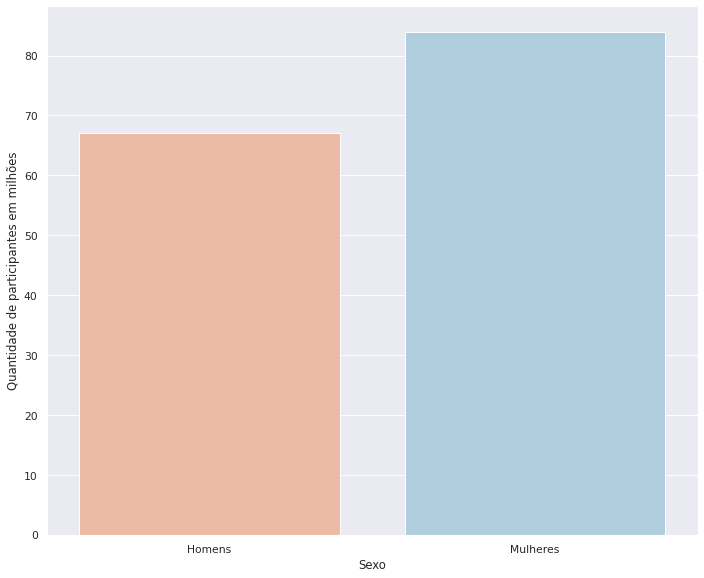

In [ ]:
sns.set_theme(
    style='darkgrid',
    # palette='dark',
    rc = {
        'legend.loc': 'upper right',
    }
)
fig, ax = plt.subplots(dpi=70, figsize=(12, 10))

sns.countplot(data=df, x= df["TP_SEXO"].map({"F": "Mulheres", "M": "Homens"}),
             palette="RdBu", ax=ax)

for c in ax.containers:
    for v in c:
        bar_height = v.get_height()
        x_value = v.get_x()
        text = "{:.1%}".format(bar_height/len(df))
ax.set_ylabel("Quantidade de participantes em milhões")
ax.set_xlabel("Sexo")

### Nota média por fatores sociais

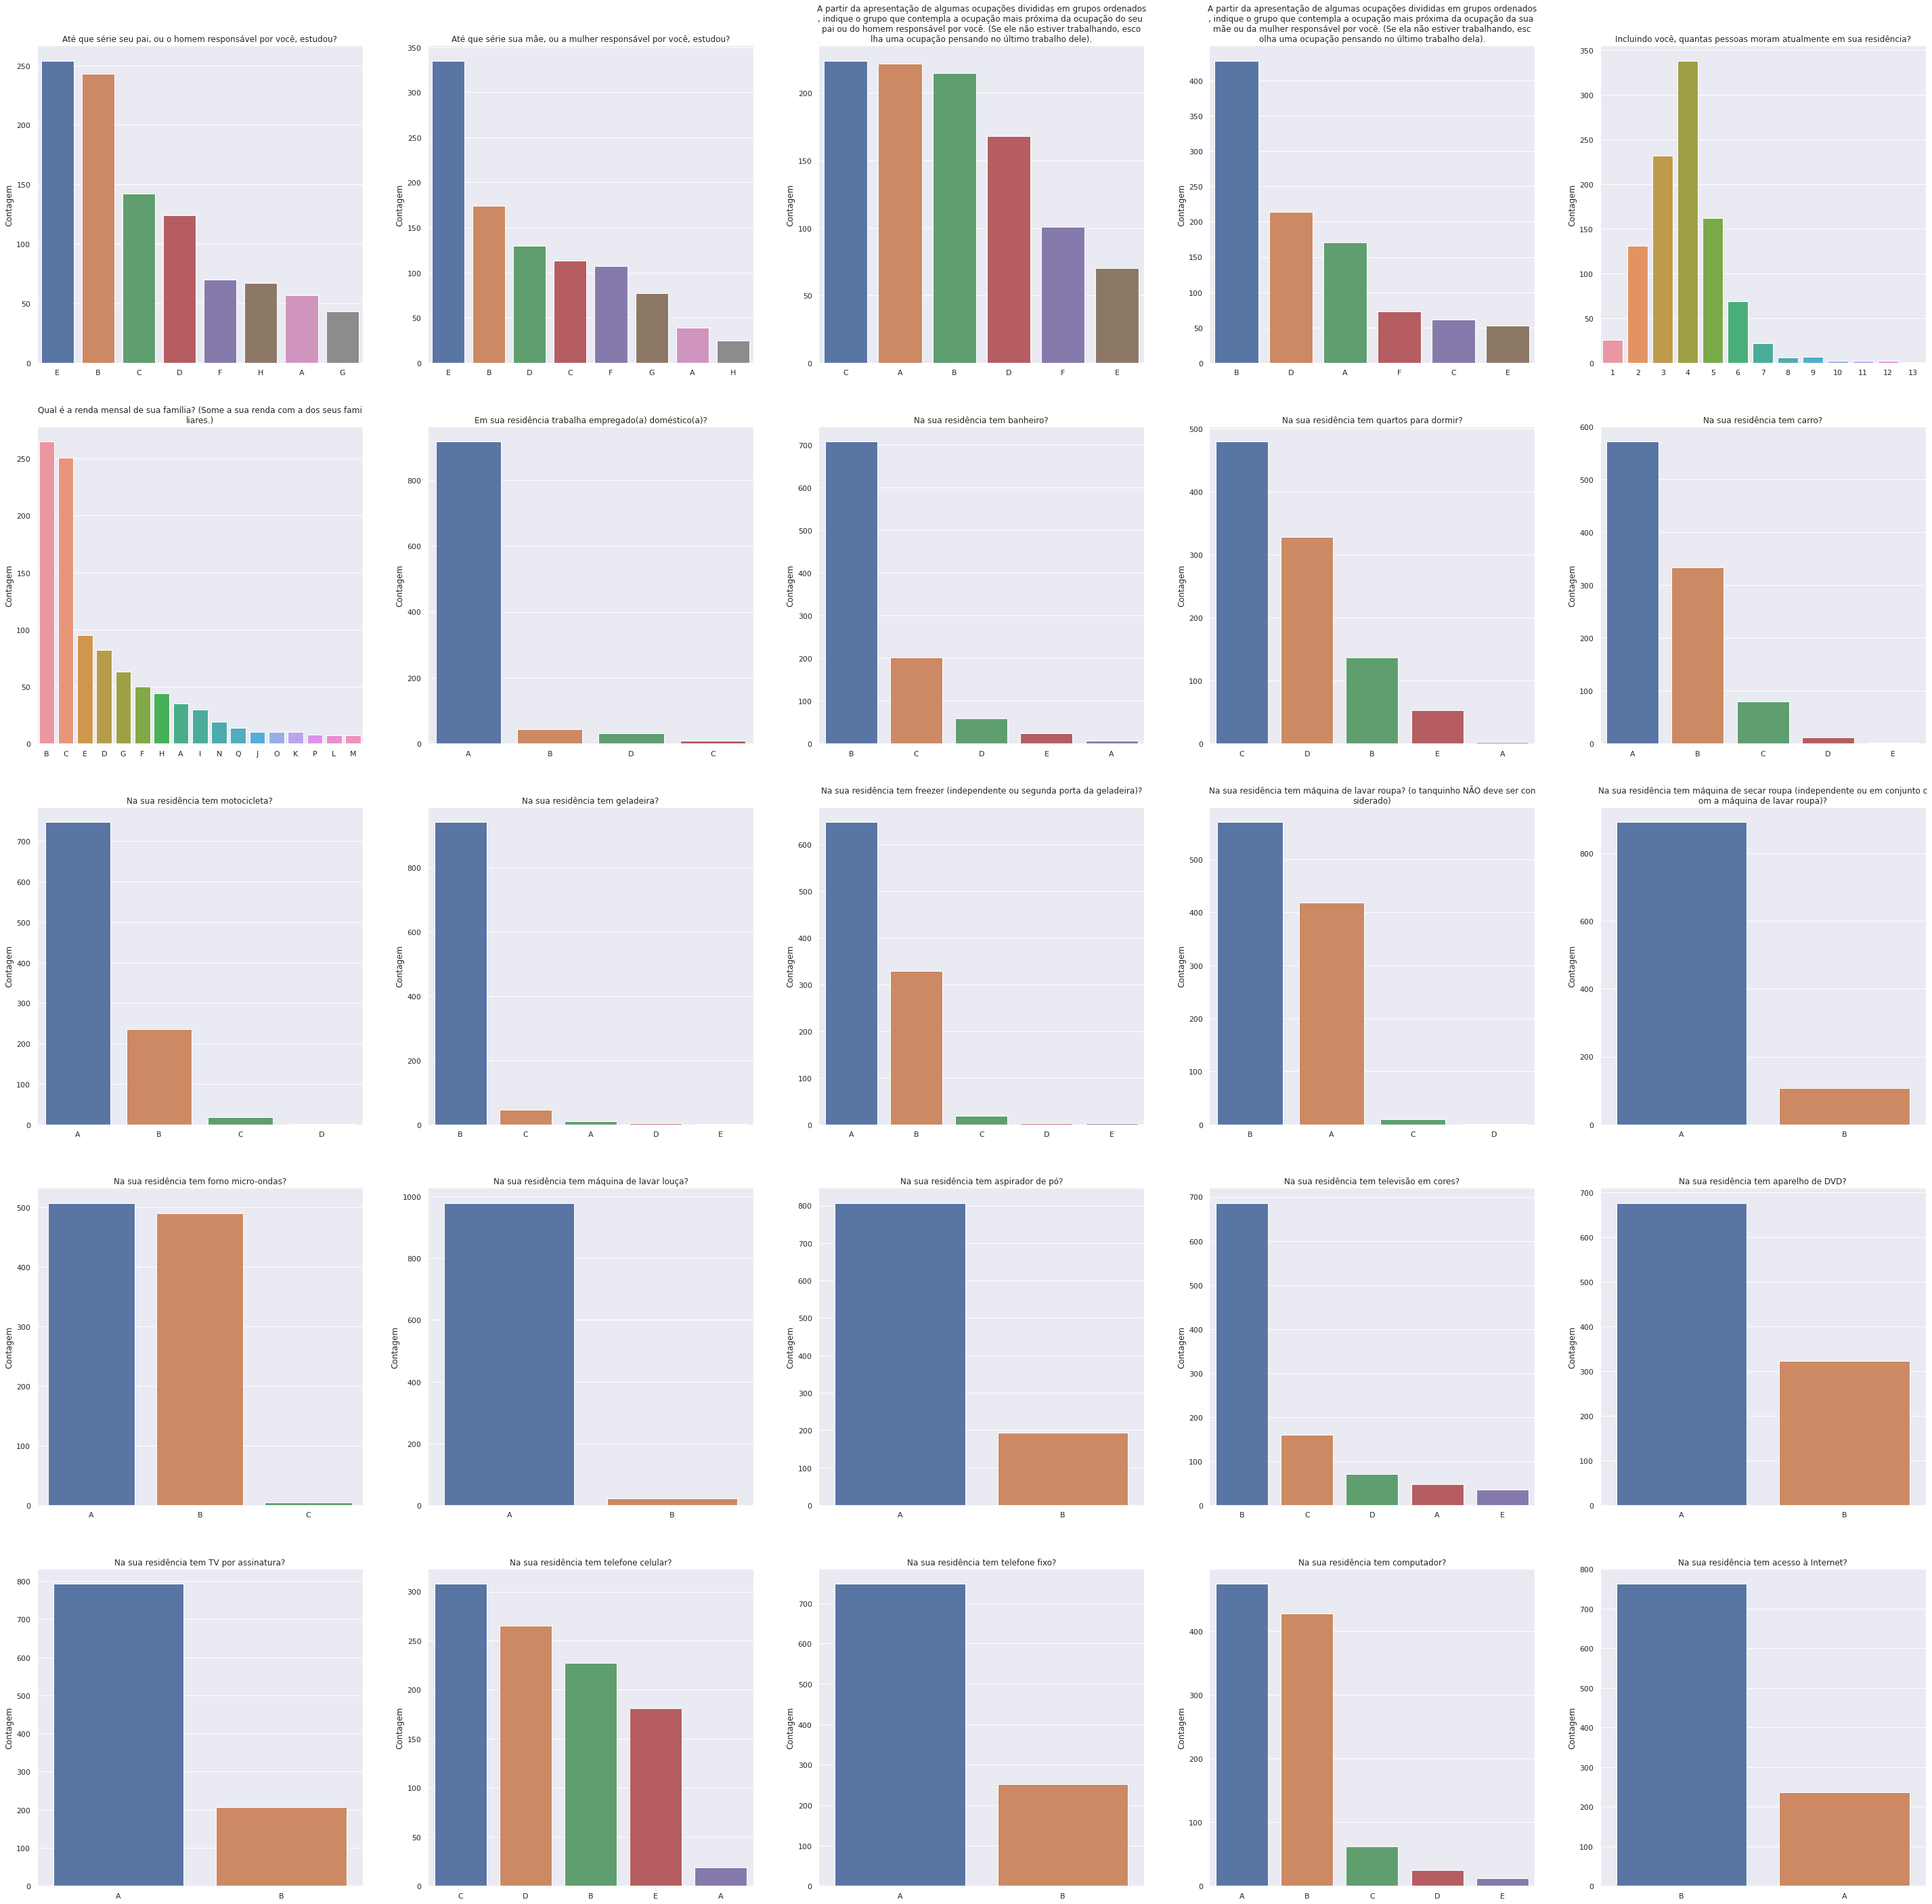

In [ ]:
fig = plt.figure(figsize=(50,50))
axs = fig.subplots(5,5)
for ax, column in zip(axs.flat, df.columns[df.columns.str.startswith('Q')]):
    counts = df[column].value_counts().sort_values(ascending=False)
    sns.barplot(x=counts.index, y=counts, ax=ax)
    ax.set_ylabel('Contagem')
    title = descriptions.loc[column, 'Descrição']
    title = re.sub("(.{75})", "\\1\n", title, 0, re.DOTALL)
    ax.set_title(title)

### Nota média por sexo, estado civil, raça e etc

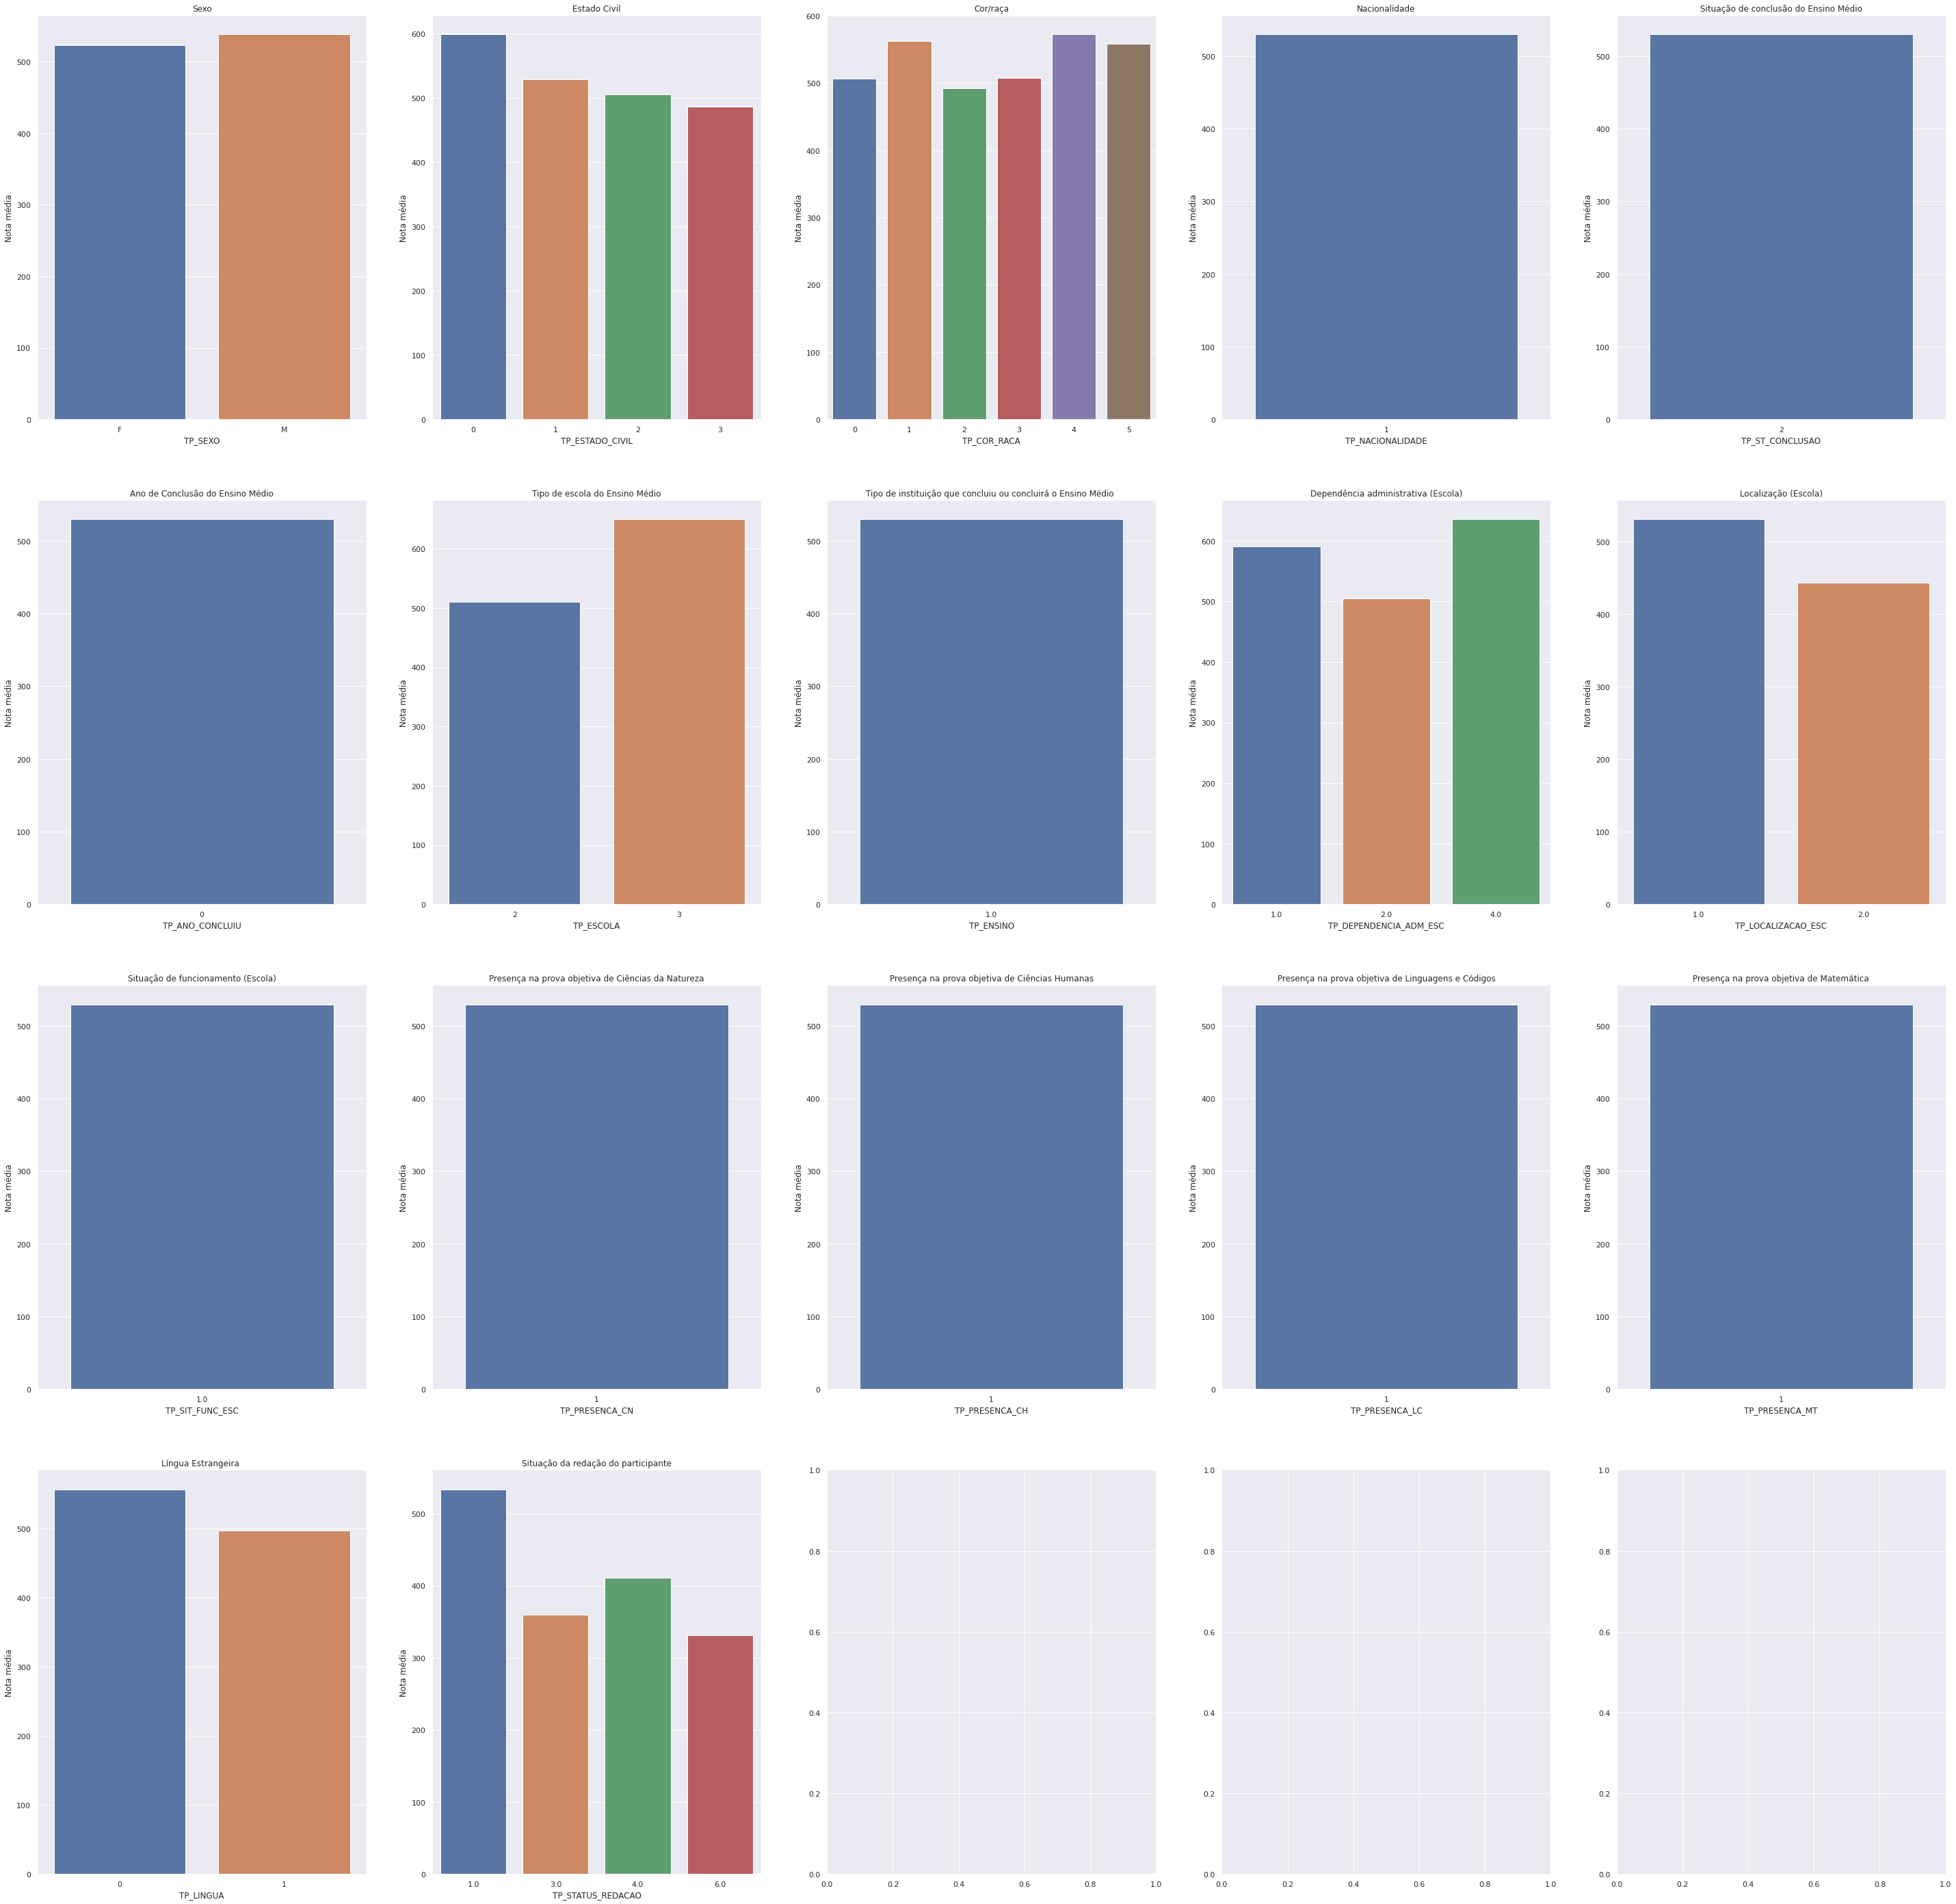

In [ ]:
fig = plt.figure(figsize=(50,50))
axs = fig.subplots(4,5)
for ax, column in zip(axs.flat, df.columns[df.columns.str.startswith('TP')]):
    grades = df[[column, *df.columns[df.columns.str.startswith('NU_NOTA')]]].groupby(column).mean().mean(axis=1)
    sns.barplot(x=grades.index, y=grades, ax=ax)
    ax.set_ylabel('Nota média')
    title = descriptions.loc[column, 'Descrição']
    title = re.sub("(.{75})", "\\1\n", title, 0, re.DOTALL)
    ax.set_title(title)

### Nota média de treineiro e portadores de condições especiais

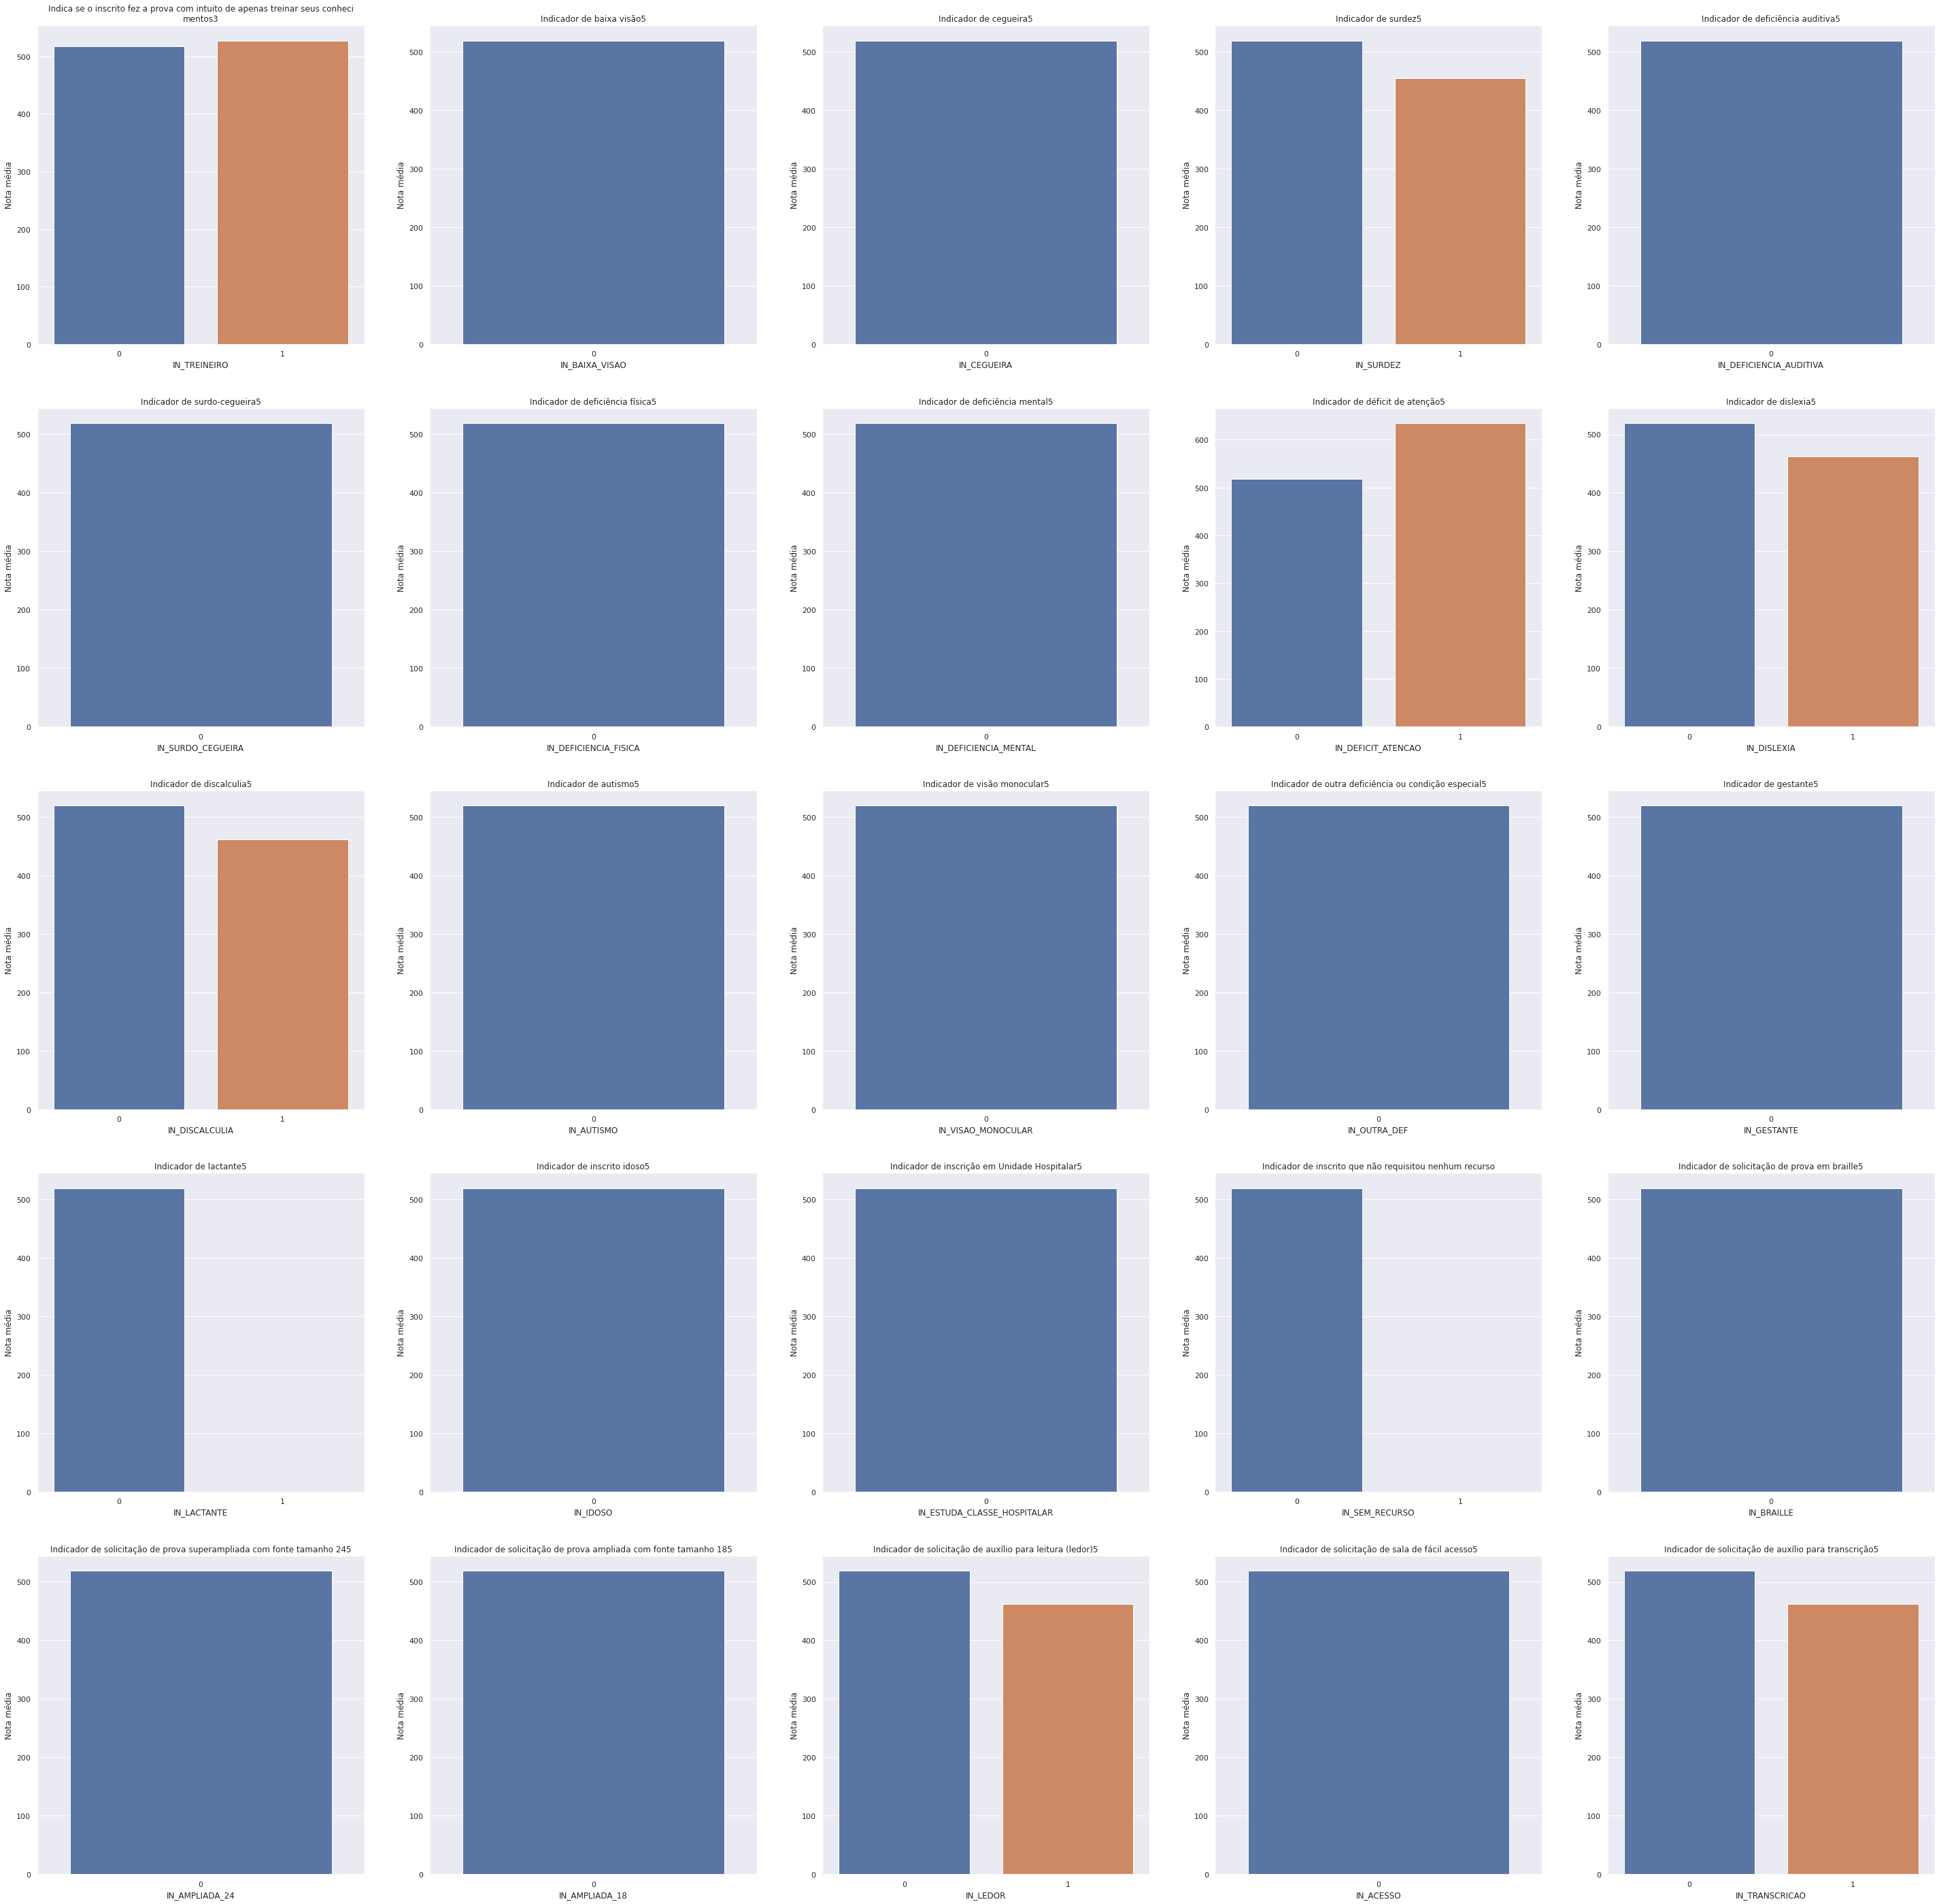

In [ ]:
fig = plt.figure(figsize=(50,50))
axs = fig.subplots(5,5)
for ax, column in zip(axs.flat, df.columns[df.columns.str.startswith('IN')]):
    grades = df[[column, *df.columns[df.columns.str.startswith('NU_NOTA')]]].groupby(column).mean().mean(axis=1)
    sns.barplot(x=grades.index, y=grades, ax=ax)
    ax.set_ylabel('Nota média')
    title = descriptions.loc[column, 'Descrição']
    title = re.sub("(.{75})", "\\1\n", title, 0, re.DOTALL)
    ax.set_title(title)

### Presença por Condições especiais

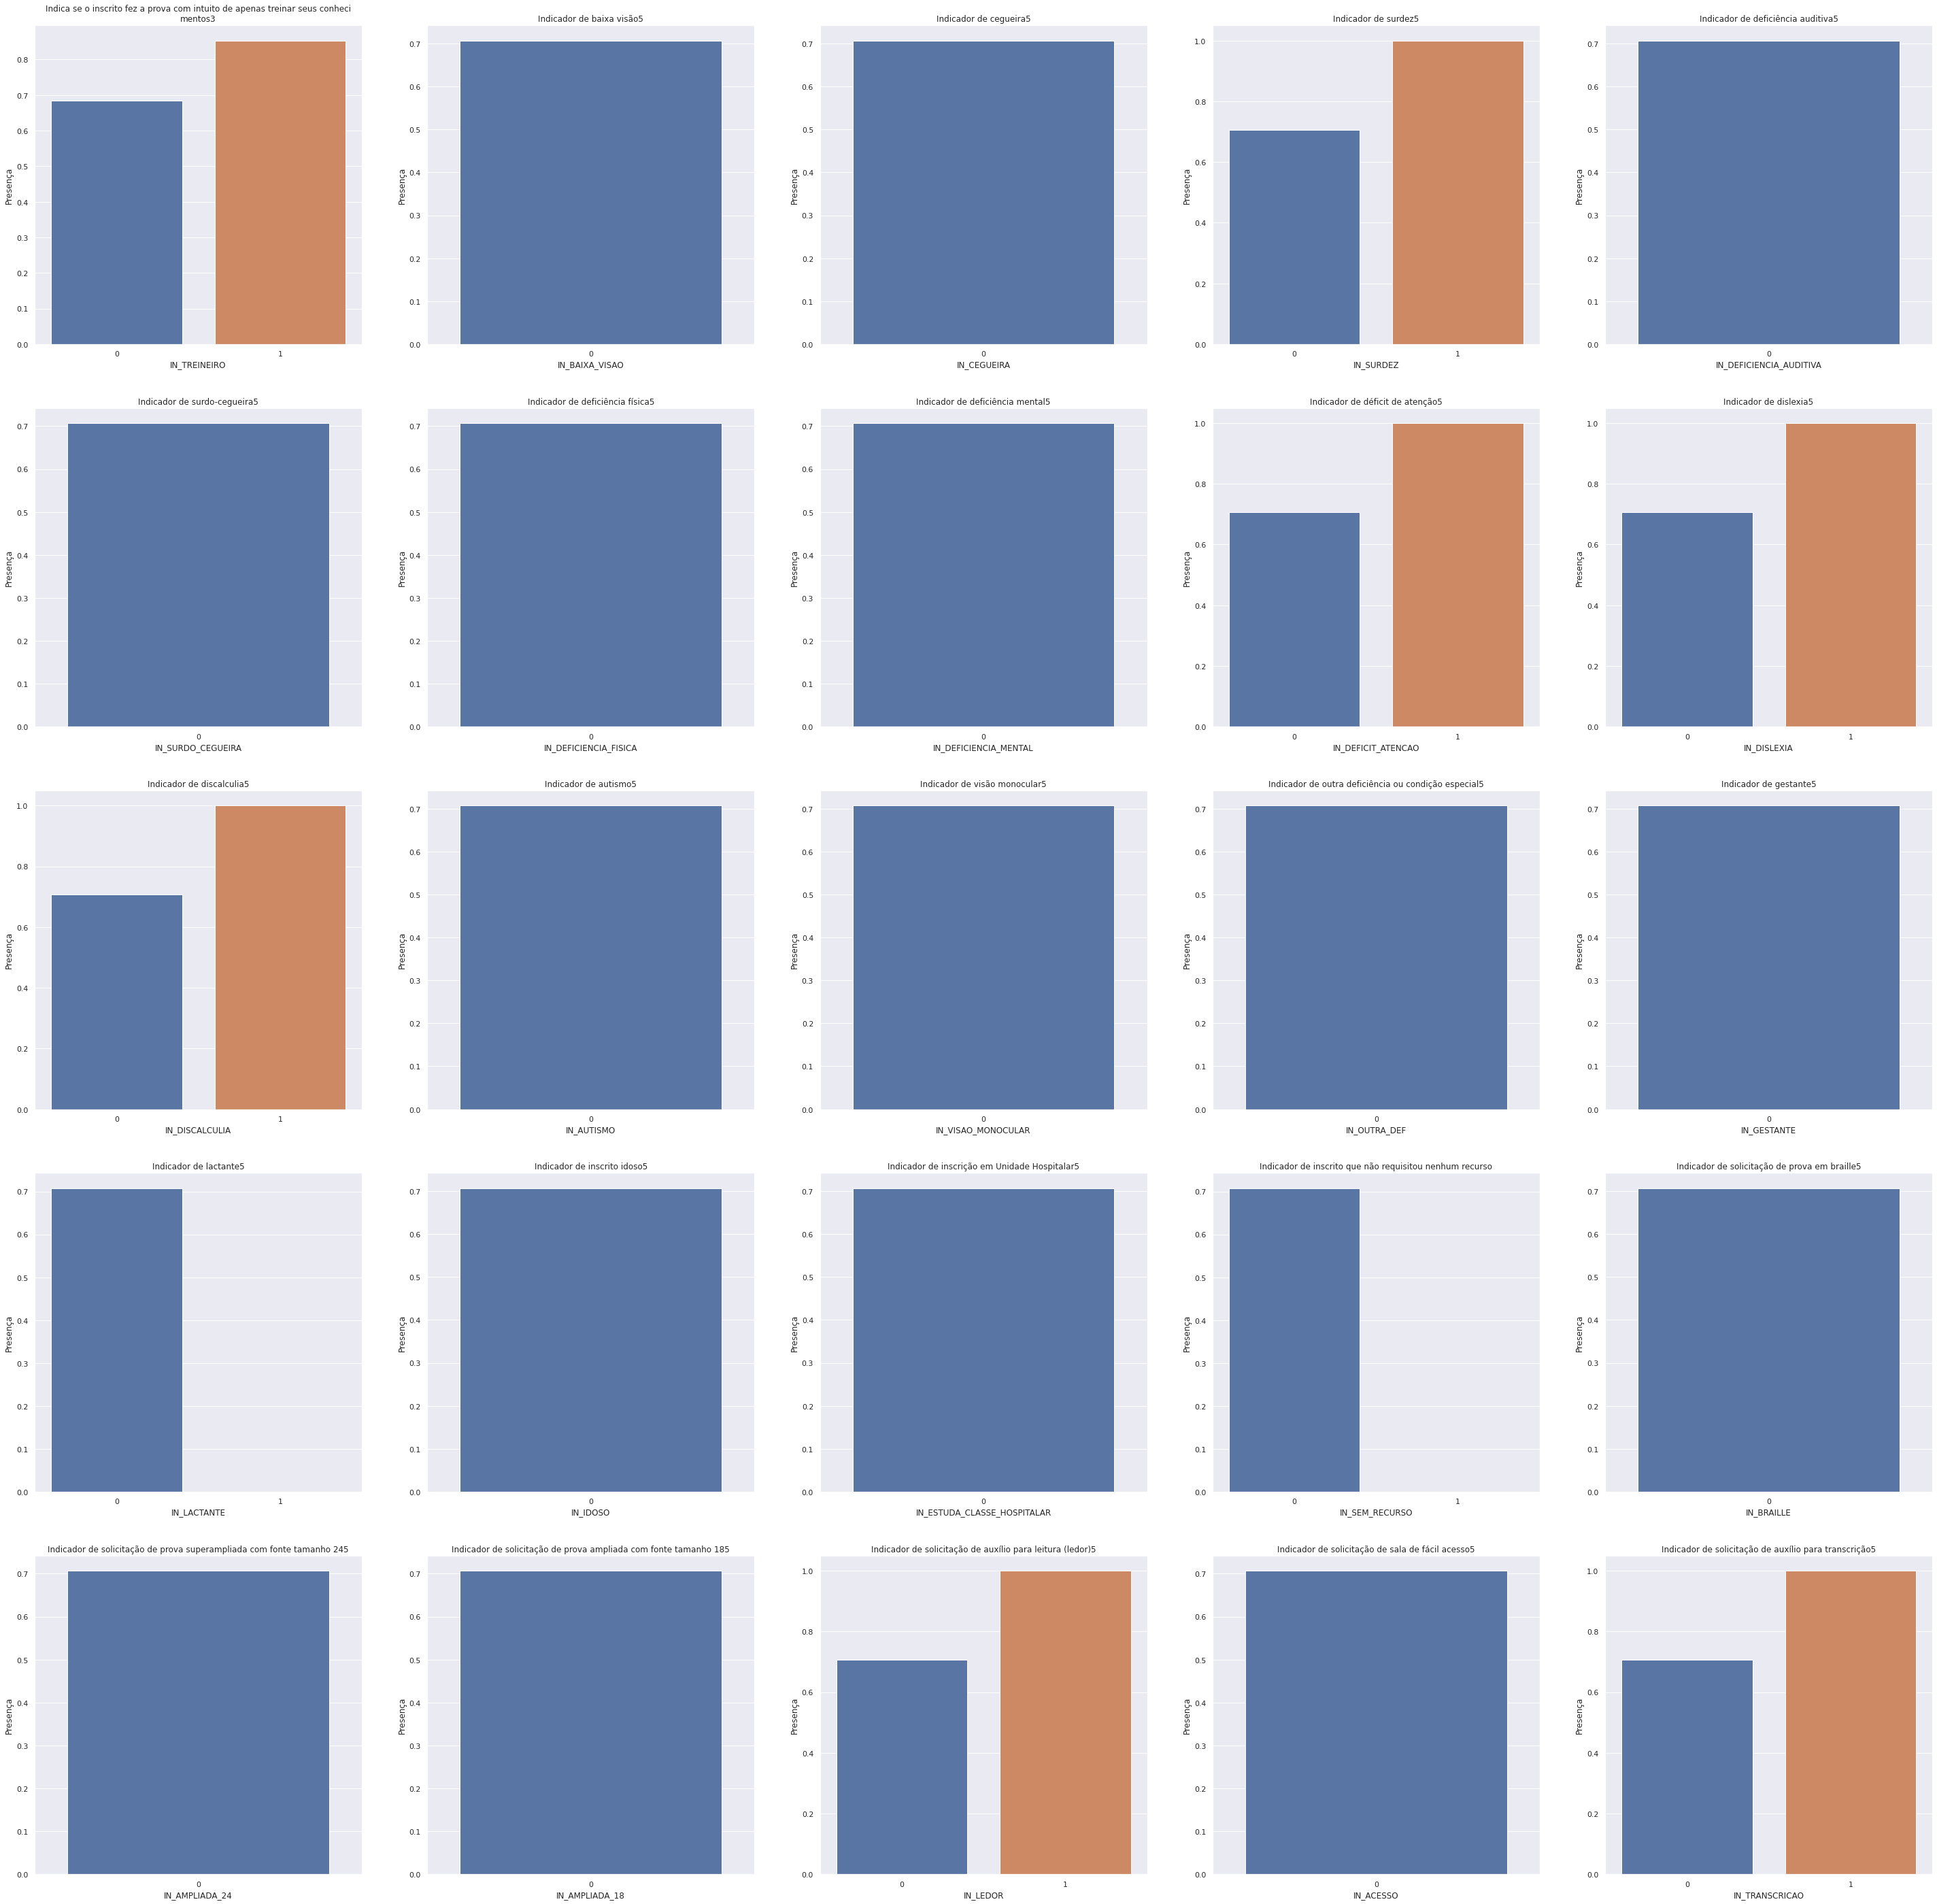

In [ ]:
fig = plt.figure(figsize=(50,50))
axs = fig.subplots(5,5)
for ax, column in zip(axs.flat, df.columns[df.columns.str.startswith('IN')]):
    grades = df[[column, *df.columns[df.columns.str.startswith('TP_PRESENCA_CN')]]].groupby(column).mean().mean(axis=1)
    sns.barplot(x=grades.index, y=grades, ax=ax)
    ax.set_ylabel('Presença')
    title = descriptions.loc[column, 'Descrição']
    title = re.sub("(.{75})", "\\1\n", title, 0, re.DOTALL)
    ax.set_title(title)

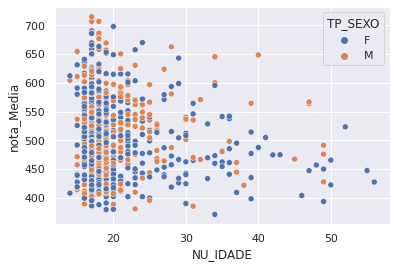

In [ ]:
sns.scatterplot(data=df, x="NU_IDADE", y="nota_Media", hue='TP_SEXO')

# TODO

* Plotar relação entre notas e colunas de escola (TP) - Feito
* Ver se os INs relevante a prova (tempo extra por PCD, etc.) não tem relação com a nota - Feito
* Talvez ver se relaçã entre características da pessoa e faltar (mas pensar se não é coincidência porque pode ser) - Feito
* Talvez tirar as pessoas que nao tem presença em alguam prova antes de treinar - Feito
* Plotar nota por prova por questao que começa com Q (gráfico de barras) - Feito

## Modelo de regressão

### EDA

In [ ]:
nota_E = df[(df['nota_Media'] > 0) & (df['nota_Media'] <= 200)]
nota_D = df[(df['nota_Media'] > 200) & (df['nota_Media'] <= 400)]
nota_C = df[(df['nota_Media'] > 400) & (df['nota_Media'] <= 600)]
nota_B = df[(df['nota_Media'] > 600) & (df['nota_Media'] <= 800)]
nota_A = df[(df['nota_Media'] > 800) & (df['nota_Media'] <= 1000)]

Text(0.5, 1.0, 'Idade dos participantes do ENEM 2019')

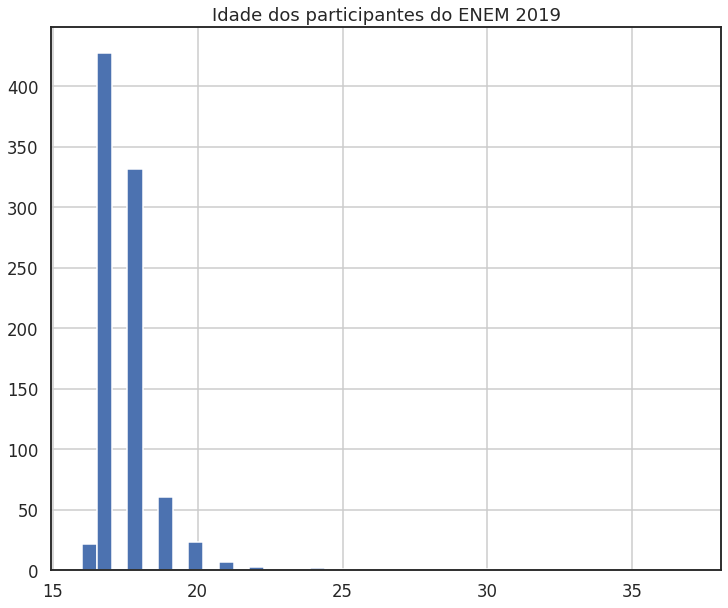

In [20]:
sns.set_theme(style="white", context="talk")
df["NU_IDADE"].hist(bins = 40, figsize = (12,10)).set_title("Idade dos participantes do ENEM 2019")

Text(0.5, 0, 'Etnia')

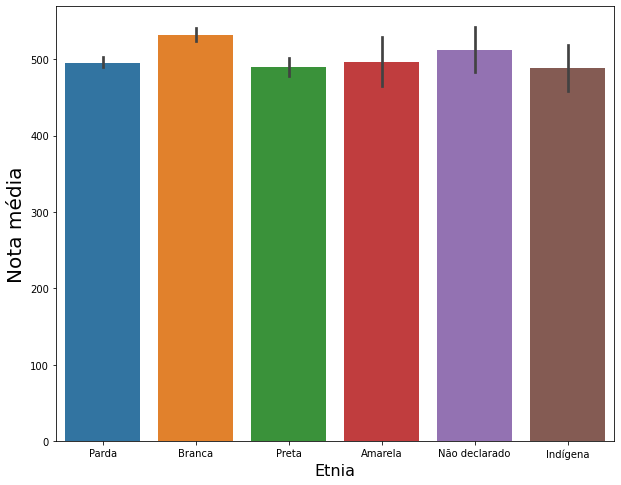

In [9]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.barplot(data=df,
            x = df['TP_COR_RACA'].map({0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena'}), y = df['nota_Media']);
plt.ylabel('Nota média', fontsize=20)
plt.xlabel('Etnia', fontsize=16)

Text(0.5, 0, 'Modalidade')

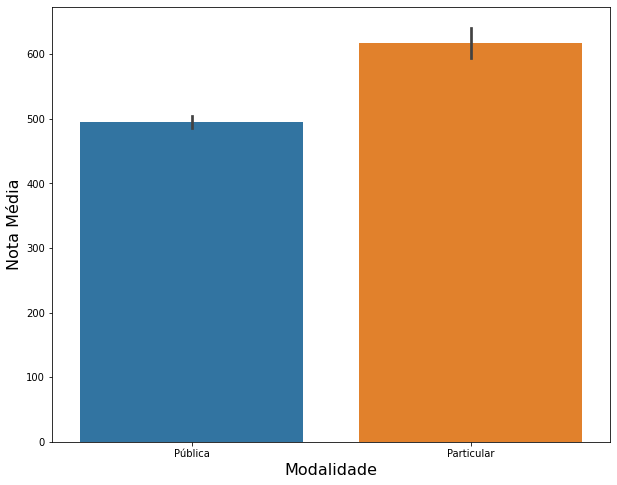

In [ ]:
sns.barplot(data=df, x = df['TP_ESCOLA'].map({1:'Não respondeu',2:'Pública',3:'Particular'}), y = df['nota_Media'])
plt.ylabel('Nota Média', fontsize=16)
plt.xlabel('Modalidade', fontsize=16)

In [ ]:
sns.pairplot(data = df[['NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'nota_Media']], size=4,diag_kind="hist")

Text(0.5, 0, 'Idade')

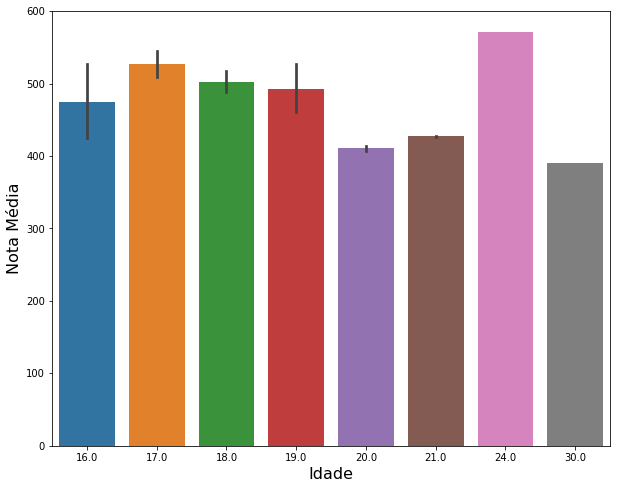

In [ ]:
sns.barplot(data=df, x = 'NU_IDADE', y = 'nota_Media')
plt.ylabel('Nota Média', fontsize=16)
plt.xlabel('Idade', fontsize=16)

Text(0.5, 0, 'Estado Civil')

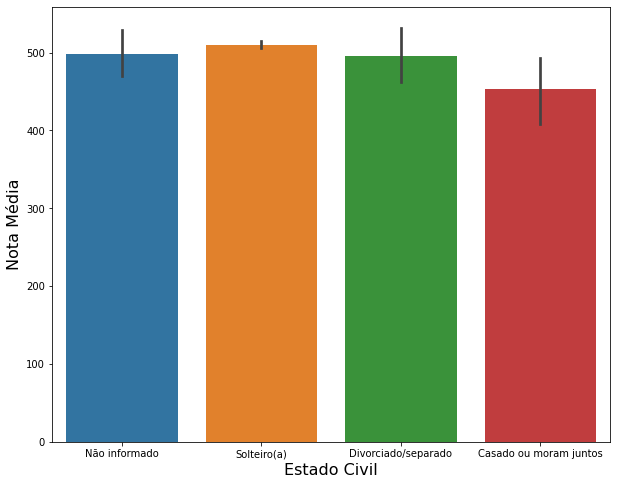

In [12]:
sns.barplot(data=df, x = df['TP_ESTADO_CIVIL'].map({0:'Não informado', 1:'Solteiro(a)', 2:'Casado ou moram juntos', 3:'Divorciado/separado'}), y = 'nota_Media')
plt.ylabel('Nota Média', fontsize=16)
plt.xlabel('Estado Civil', fontsize=16)

Text(0, 0.5, 'Nota Média')

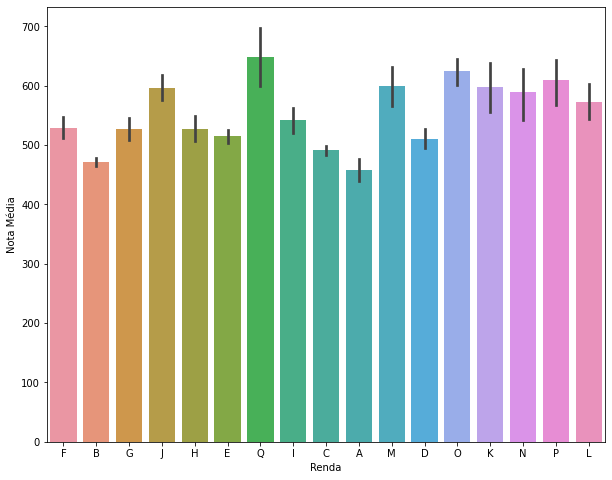

In [18]:
sns.barplot(data=df, x= 'Q006', y = 'nota_Media')
plt.xlabel('Renda')
plt.ylabel('Nota Média')

### Fazer só com as colunas numéricas

In [ ]:
### Fazer isso só com as colunas numéricas
#sns.pairplot(dados.iloc[:, :10])

In [ ]:
#plt.figure(figsize=(50, 50))
#sns.heatmap(dados.corr(''), annot=True, fmt='.0%')
#IN_SEM_RECURSO

In [ ]:
#plt.figure(figsize=(50, 50))
#sns.heatmap(dados.corr(), annot=True, fmt='.0%')

In [ ]:
"""
Como treinar qualquer modelo:

Iniciante:
* Train test split (se ja nao foi separado, nesse caso nao precisa)
* Treino com o dataset de treino
* Gera as predições com conjunto de teste (x)
* Calcula erros: RMSE, MAE, R2, etc.
* Compara os resultados, testa usar menos ou mais variáveis, etc.
* Começa so com as numéricas

Intermediário:
* Train test split (se ja nao foi separado, nesse caso nao precisa)
* Validação cruzada com k fold
* Gera as predições com o conjunto de teste (x)
* Calcula erros: RMSE, MAE, R2, etc.
* Compara os resultados de validação e treino


Repete o passo para varios modelos. Recomendado: LinearRegession para começar, LinearRegression com algumas variáveis criadas multiplicando, tirando raiz quadrada, polinômio, etc. de variáveis que existe (vc escolhe a função vendo qual tem a maior correlação com o y)
Depois se quiser pode usar Ridge, Lasso, ElasticNet, SVR, e fazer tuning de parâmetros 

Faz um passo para cada nota do enem
"""

# Treino Modelo 1

In [ ]:
train_size = int(len(df)*0.6)
X = df[['NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA']]
Y = df['nota_Media']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=42)

In [ ]:
reg = LinearRegression()
modelo1 = reg.fit(X_train, y_train)
y_pred = modelo1.predict(X_test)
reg.coef_

array([ -3.32540369, -30.38675754,  -9.33935675,  38.19163645,
        36.97108022,  40.34924864])

Cálculo de erros

In [ ]:
#Erro quadrado
mean_squared_error(y_test, y_pred)

52164.48434396647

In [ ]:
#Erro absoluto
mean_absolute_error(y_test, y_pred)

199.51093134925782

In [ ]:
#R2 Score
r2 = r2_score(y_test, y_pred)
r2

0.04684021835660357

# Treino Modelo 2

In [ ]:
train_size = int(len(df)*0.6)
X = df[['NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA']]
Y = df['nota_Media']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=13)

In [ ]:
reg = LinearRegression()
modelo2 = reg.fit(X_train, y_train)
y_pred = modelo2.predict(X_test)
reg.coef_

array([-4.56548378, -8.37902166, 43.39905386, 34.90637377])

Cálculo de erros

In [ ]:
#Erro quadrado
mean_squared_error(y_test, y_pred)

53863.565998641374

In [ ]:
#Erro absoluto
mean_absolute_error(y_test, y_pred)

199.25388760501193

In [ ]:
#R2 Score
r2 = r2_score(y_test, y_pred)
r2

0.04456118748647042

# Treino Modelo 3

In [ ]:
train_size = int(len(df)*0.6)
#Q006
X = df[['NU_IDADE', 'TP_COR_RACA', 'IN_TREINEIRO']]
Y = df['nota_Media']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=22)

In [ ]:
reg = LinearRegression()
modelo3 = reg.fit(X_train, y_train)
y_pred = modelo3.predict(X_test)
reg.coef_

array([-6.52485629, -6.71624292, 49.027796  ])

Cálculo de erros

In [ ]:
#Erro quadrado
mean_squared_error(y_test, y_pred)

58994.21113556154

In [ ]:
#Erro absoluto
mean_absolute_error(y_test, y_pred)

202.63909938179782

In [ ]:
#R2
r2 = r2_score(y_test, y_pred)
r2

-0.007764099108755973

## Análise Exploratória de Dados

In [ ]:
#?pd.DataFrame.describe
df.describe

<bound method NDFrame.describe of                              NU_INSCRICAO  CO_MUNICIPIO_RESIDENCIA  \
0    d7e73c5f-2db8-4089-9bee-d3a0e045f87f                  1100023   
1    668bf6e4-ddf7-4810-b31e-7d325e36de4d                  3106200   
2    951e80d6-ac9b-4ff2-8130-fcbc8ac78b16                  3139409   
3    baf409f9-ddc6-4e82-9a4b-b64b579cd105                  2506301   
4    9fd415ac-3421-44ce-810e-599545c3c025                  2304400   
..                                    ...                      ...   
995  a32cf5fc-ec74-4bf0-a8ab-8213d028b223                  1302603   
996  d6c81589-a33a-464a-9621-33b15dc01324                  4108304   
997  97bfd395-de14-4a52-98fc-524e2b029897                  3510609   
998  ebe4ca77-a52d-44a9-8adc-d725843d20c3                  2304400   
999  f26903d2-df6b-4d8d-a5d7-855c23d6c116                  3304904   

    NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
0                 Ariquemes                11    

In [ ]:
df.info

<bound method DataFrame.info of                              NU_INSCRICAO  CO_MUNICIPIO_RESIDENCIA  \
0    d7e73c5f-2db8-4089-9bee-d3a0e045f87f                  1100023   
1    668bf6e4-ddf7-4810-b31e-7d325e36de4d                  3106200   
2    951e80d6-ac9b-4ff2-8130-fcbc8ac78b16                  3139409   
3    baf409f9-ddc6-4e82-9a4b-b64b579cd105                  2506301   
4    9fd415ac-3421-44ce-810e-599545c3c025                  2304400   
..                                    ...                      ...   
995  a32cf5fc-ec74-4bf0-a8ab-8213d028b223                  1302603   
996  d6c81589-a33a-464a-9621-33b15dc01324                  4108304   
997  97bfd395-de14-4a52-98fc-524e2b029897                  3510609   
998  ebe4ca77-a52d-44a9-8adc-d725843d20c3                  2304400   
999  f26903d2-df6b-4d8d-a5d7-855c23d6c116                  3304904   

    NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
0                 Ariquemes                11      

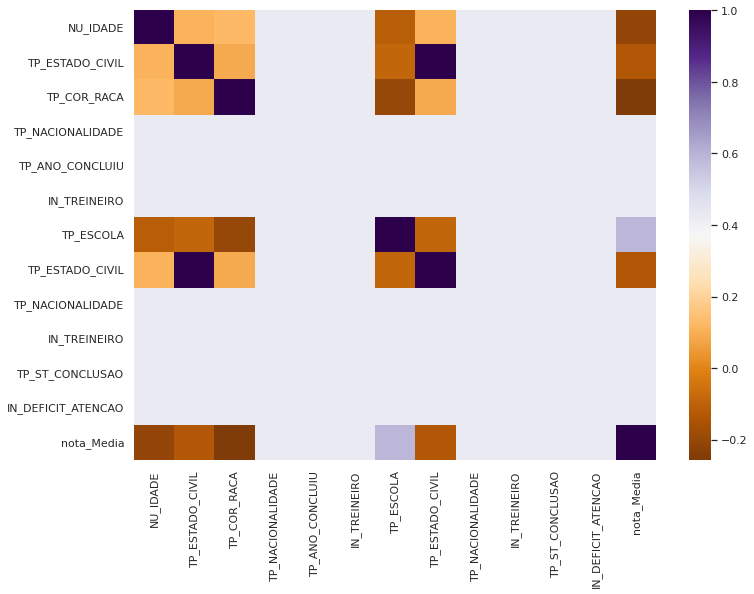

In [ ]:
col_selecionadas = df[['NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU','IN_TREINEIRO', 'Q006', 'TP_ESCOLA', 'TP_ESTADO_CIVIL', 'TP_NACIONALIDADE', 'IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'IN_DEFICIT_ATENCAO', 'nota_Media']]
corr_matrix=col_selecionadas.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr_matrix, cmap='PuOr')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


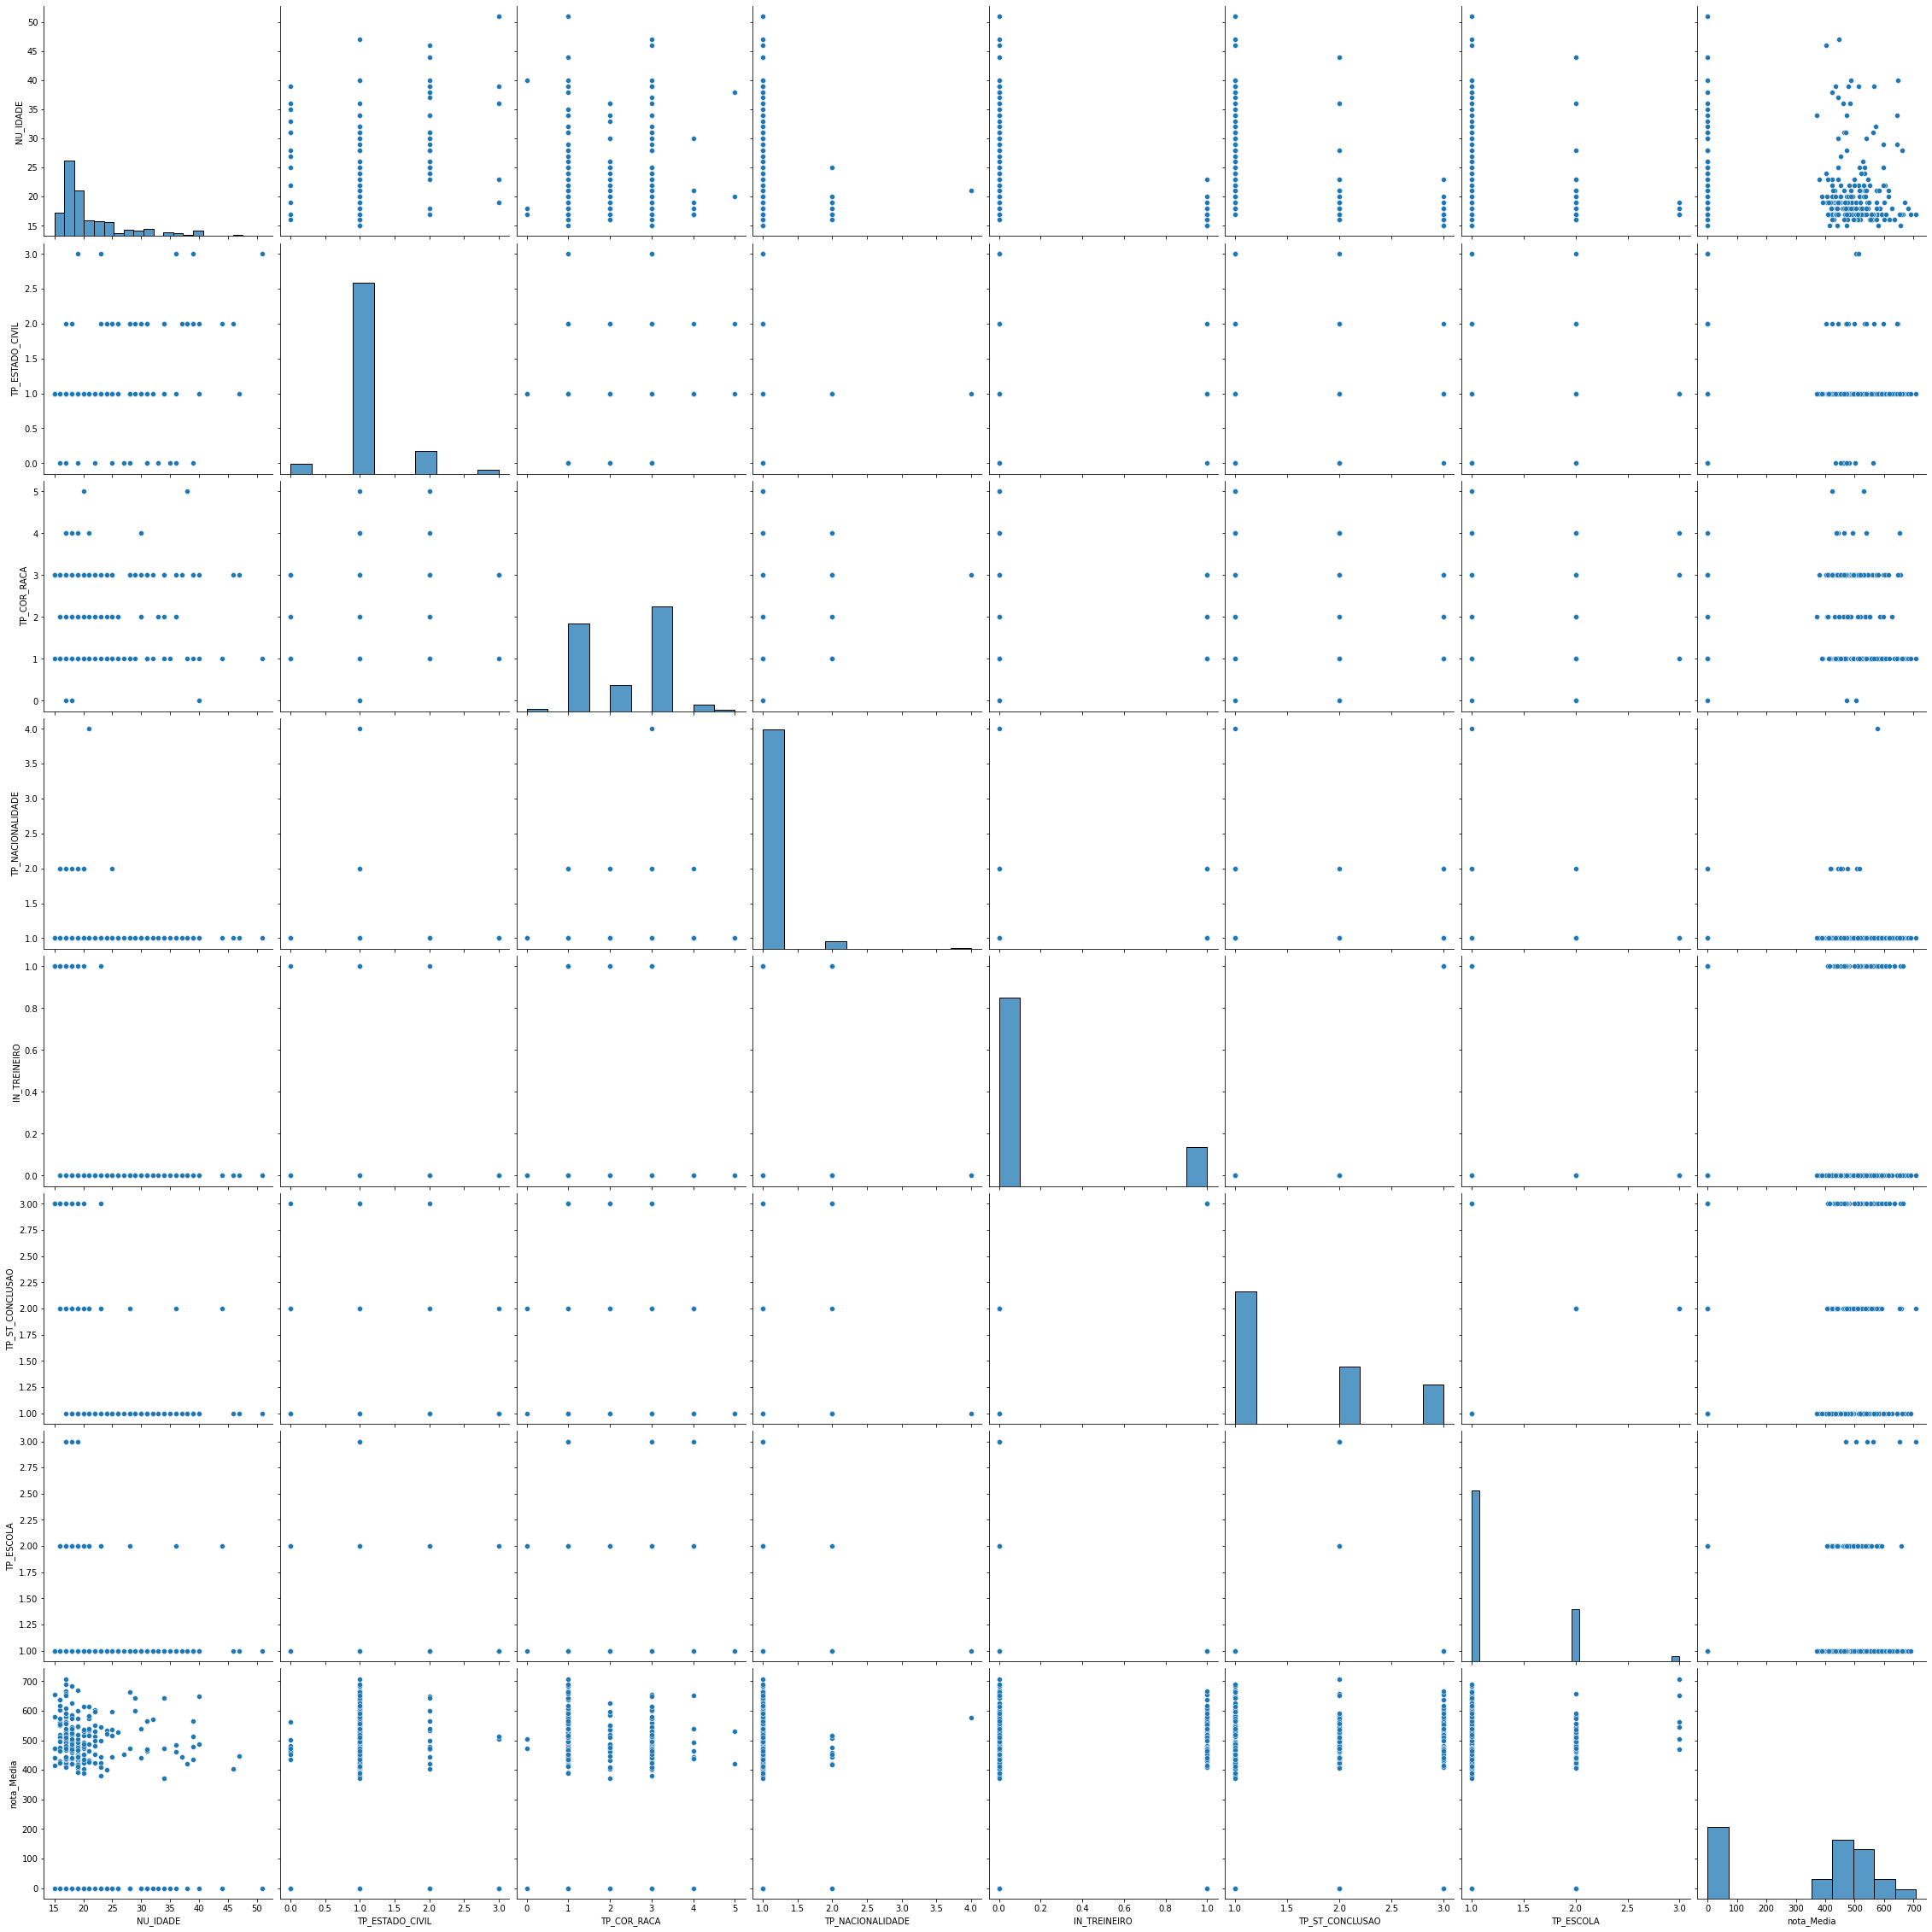

In [ ]:
sns.pairplot(data = df[['NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'nota_Media']], size=4,diag_kind="hist")

In [ ]:
#One hot
#Pairplot com barra

## Treino de modelo

### Regressão Linear

In [ ]:
# TODO: Testar várias combinações de variáveis e potências, multiplicações, etc.

In [ ]:
?LinearRegression

In [ ]:
# TODO: Testar normalizar e usar Ridge e Lasso

In [ ]:
A = train[train.columns[train.columns.str.startswith('IN_SALA_ESPECIAL')]]

In [ ]:
print(A)

In [ ]:
b = 0
for i in train.columns:
  if i.isdecimal():
    b = i

In [ ]:
print(i)